In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import scipy.stats as stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')





Context
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


The data-set aims to answer the following key questions: 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan? 3. How does Infant and Adult mortality rates affect life expectancy? 4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc. 5. What is the impact of schooling on the lifespan of humans? 6. Does Life Expectancy have positive or negative relationship with drinking alcohol? 7. Do densely populated countries tend to have lower life expectancy? 8. What is the impact of Immunization coverage on life Expectancy?

Columns
CountryCountry
YearYear
StatusDeveloped or Developing status
Life expectancy Life Expectancy in age
Adult MortalityAdult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
infant deathsNumber of Infant Deaths per 1000 population
AlcoholAlcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
percentage expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)
Hepatitis BHepatitis B (HepB) immunization coverage among 1-year-olds (%)
Measles Measles - number of reported cases per 1000 population
BMI Average Body Mass Index of entire population
under-five deaths Number of under-five deaths per 1000 population
PolioPolio (Pol3) immunization coverage among 1-year-olds (%)
Total expenditureGeneral government expenditure on health as a percentage of total government expenditure (%)
Diphtheria Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDSDeaths per 1 000 live births HIV/AIDS (0-4 years)
GDPGross Domestic Product per capita (in USD)
PopulationPopulation of the country
thinness 1-19 yearsPrevalence of thinness among children and adolescents for Age 10 to 19 (% )
thinness 5-9 yearsPrevalence of thinness among children for Age 5 to 9(%)
Income composition of resourcesHuman Development Index in terms of income composition of resources (index ranging from 0 to 1)
SchoolingNumber of years of Schooling(years)

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect the life expectancy.

In the feature engineering step, you need to select a suit of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Summarize your findings. One of the most important skills of a data scientist is to convey the ideas and findings to the non-technical people using an appropriate language. In this regard, one of the most effective way to tell your ideas is to do it using effective visualization.

In [2]:
df_le = pd.read_csv('Life Expectancy Data.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

1. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

# Data Cleaning

In [151]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [4]:
df_le.shape

(2938, 22)

In [5]:
df_le.index

RangeIndex(start=0, stop=2938, step=1)

In [6]:
df_le.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [8]:
df_le.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [9]:
df_le.isna().sum() / df_le.isna().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [10]:
#Fix the name of the column for easy string command
df_le.columns = df_le.columns.str.strip().str.replace(' ','_').str.replace('-','_').str.lower()

In [11]:
df_le.rename(columns={'country':'cntry', 'year':'yrs', 'life_expectancy': 'life_exp', 'adult_mortality':'adult_mort',
       'infant_deaths':'inf_dths', 'alcohol':'alc', 'percentage_expenditure':'prcnt_expend', 'hepatitis_b':'hep_b',
        'under_five_deaths':'und_5_dths', 'total_expenditure':'tot_expend',
       'diphtheria':'dip', 'population':'pop', 'thinness__1_19_years':'thin_1to19_yrs',
       'thinness_5_9_years':"thin_5to9_yrs", 'income_composition_of_resources':'inc_comp_res'}, inplace=True)

In [12]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  
0         0.479       10.1  
1         0.476       10.0  
2         0.470        9.9  
3         0.463        9.8  
4         0.454        9.5

## FILL IN THE NULL


In [13]:
#We are answering question related to life expentancy so we check first columns life expentancy(Target variable)
df_le[df_le['life_exp'].isna()]

cntry   yrs      status  life_exp  adult_mort  inf_dths  \
624            Cook Islands  2013  Developing       NaN         NaN         0   
769                Dominica  2013  Developing       NaN         NaN         0   
1650       Marshall Islands  2013  Developing       NaN         NaN         0   
1715                 Monaco  2013  Developing       NaN         NaN         0   
1812                  Nauru  2013  Developing       NaN         NaN         0   
1909                   Niue  2013  Developing       NaN         NaN         0   
1958                  Palau  2013  Developing       NaN         NaN         0   
2167  Saint Kitts and Nevis  2013  Developing       NaN         NaN         0   
2216             San Marino  2013  Developing       NaN         NaN         0   
2713                 Tuvalu  2013  Developing       NaN         NaN         0   

       alc  prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend  \
624   0.01      0.000000   98.0        0  82.8           0   98.0        3.58   
769   0.01     11.419555   96.0        0  58.4           0   96.0        5.58   
1650  0.01    871.878317    8.0        0  81.6           0   79.0       17.24   
1715  0.01      0.000000   99.0        0   NaN           0   99.0        4.30   
1812  0.01     15.606596   87.0        0  87.3           0   87.0        4.65   
1909  0.01      0.000000   99.0        0  77.3           0   99.0        7.20   
1958   NaN    344.690631   99.0        0  83.3           0   99.0        9.27   
2167  8.54      0.000000   97.0        0   5.2           0   96.0        6.14   
2216  0.01      0.000000   69.0        0   NaN           0   69.0        6.50   
2713  0.01     78.281203    9.0        0  79.3           0    9.0       16.61   

       dip  hiv/aids          gdp     pop  thin_1to19_yrs  thin_5to9_yrs  \
624   98.0       0.1          NaN     NaN             0.1            0.1   
769   96.0       0.1   722.756650     NaN             2.7            2.6   
1650  79.0       0.1  3617.752354     NaN             0.1            0.1   
1715  99.0       0.1          NaN     NaN             NaN            NaN   
1812  87.0       0.1   136.183210     NaN             0.1            0.1   
1909  99.0       0.1          NaN     NaN             0.1            0.1   
1958  99.0       0.1  1932.122370   292.0             0.1            0.1   
2167  96.0       0.1          NaN     NaN             3.7            3.6   
2216  69.0       0.1          NaN     NaN             NaN            NaN   
2713   9.0       0.1  3542.135890  1819.0             0.2            0.1   

      inc_comp_res  schooling  
624            NaN        NaN  
769          0.721       12.7  
1650           NaN        0.0  
1715           NaN        NaN  
1812           NaN        9.6  
1909           NaN        NaN  
1958         0.779       14.2  
2167         0.749       13.4  
2216           NaN       15.1  
2713           NaN        0.0

In [14]:
df_le[df_le['status']=='Developing'].life_exp.mean()

67.11146523178817

In [15]:
#Fill Life_exp & adult_mort to it mean value fo developing countries
df_le['life_exp'].fillna(df_le[df_le['status']=='Developing'].life_exp.mean(), inplace=True)
df_le['adult_mort'].fillna(df_le[df_le['status']=='Developing'].adult_mort.mean(), inplace=True)

In [16]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling'],
      dtype='object')

In [17]:
#Remove many null on a row(Null is greater 5 in the row)
df_le.dropna(subset=['gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res'], how='all', inplace=True)

In [18]:
df_le.shape

(2936, 22)

In [19]:
#Fill all the null values through interpolation
fill_list = [ 'alc',
        'hep_b', 'bmi', 'polio',
       'tot_expend', 'dip',  'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling']
   
for col in fill_list:
    df_le.loc[:, col].interpolate(inplace=True)


In [20]:
df_le_1 = df_le.copy()
fill_list = [ 'alc',
        'hep_b', 'bmi', 'polio',
       'tot_expend', 'dip',  'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling']
   
for col in fill_list:
    print(col)

alc
hep_b
bmi
polio
tot_expend
dip
gdp
pop
thin_1to19_yrs
thin_5to9_yrs
inc_comp_res
schooling


In [21]:
# Create a dictionary of columns.
dic_col = {'life_exp':1, 'adult_mort':2, 'inf_dths':3, 'alc':4,
       'prcnt_expend':5, 'hep_b':6, 'measles':7, 'bmi':8, 'und_5_dths':9, 'polio':10,
       'tot_expend':11, 'dip':12, 'hiv/aids':13, 'gdp':14, 'pop':15, 'thin_1to19_yrs':16,
       'thin_5to9_yrs':17, 'inc_comp_res':18, 'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in dic_col.items():
    print('variable: {} \n i: {}'.format(variable, i))
    

variable: life_exp 
 i: 1
variable: adult_mort 
 i: 2
variable: inf_dths 
 i: 3
variable: alc 
 i: 4
variable: prcnt_expend 
 i: 5
variable: hep_b 
 i: 6
variable: measles 
 i: 7
variable: bmi 
 i: 8
variable: und_5_dths 
 i: 9
variable: polio 
 i: 10
variable: tot_expend 
 i: 11
variable: dip 
 i: 12
variable: hiv/aids 
 i: 13
variable: gdp 
 i: 14
variable: pop 
 i: 15
variable: thin_1to19_yrs 
 i: 16
variable: thin_5to9_yrs 
 i: 17
variable: inc_comp_res 
 i: 18
variable: schooling 
 i: 19


<Figure size 1440x2160 with 0 Axes>

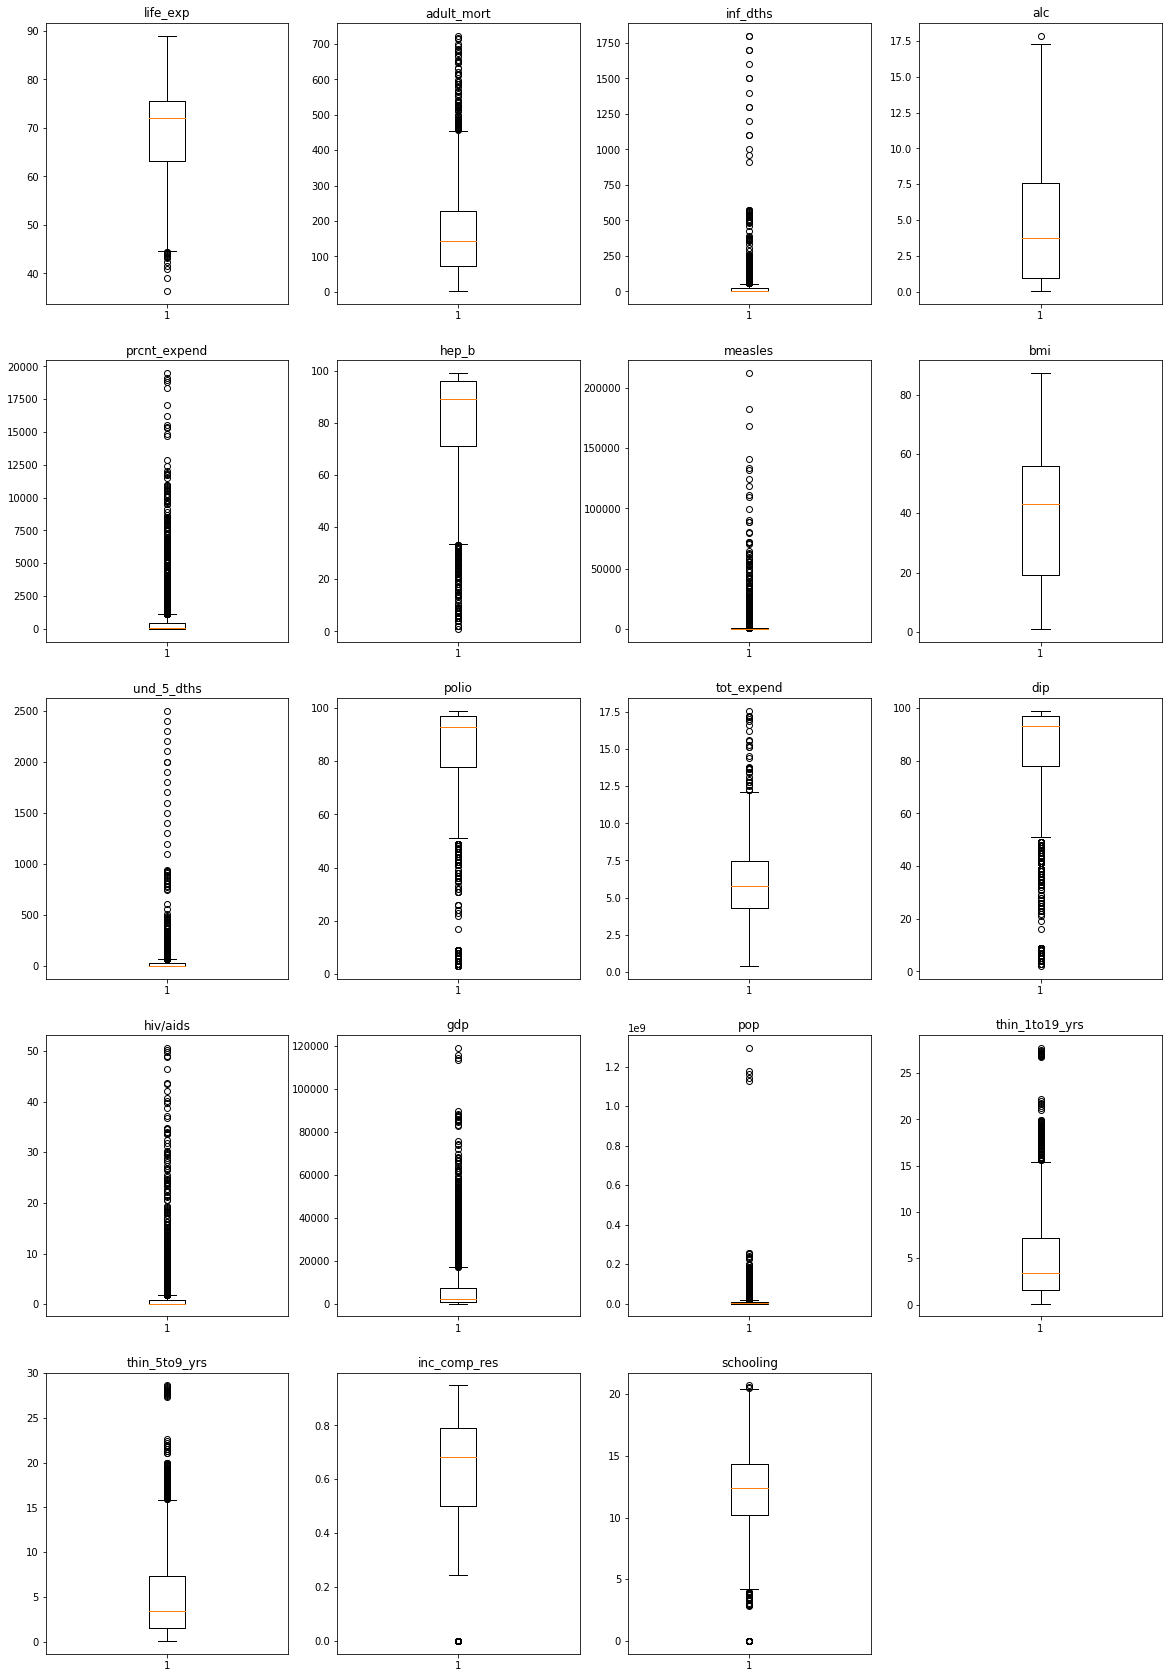

In [22]:
# Create a dictionary of columns.
dic_col = {'life_exp':1, 'adult_mort':2, 'inf_dths':3, 'alc':4,
       'prcnt_expend':5, 'hep_b':6, 'measles':7, 'bmi':8, 'und_5_dths':9, 'polio':10,
       'tot_expend':11, 'dip':12, 'hiv/aids':13, 'gdp':14, 'pop':15, 'thin_1to19_yrs':16,
       'thin_5to9_yrs':17, 'inc_comp_res':18, 'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in dic_col.items():
    plt.subplot(5,4,i)
    plt.boxplot(df_le[variable],whis=1.5)
    plt.title(variable)

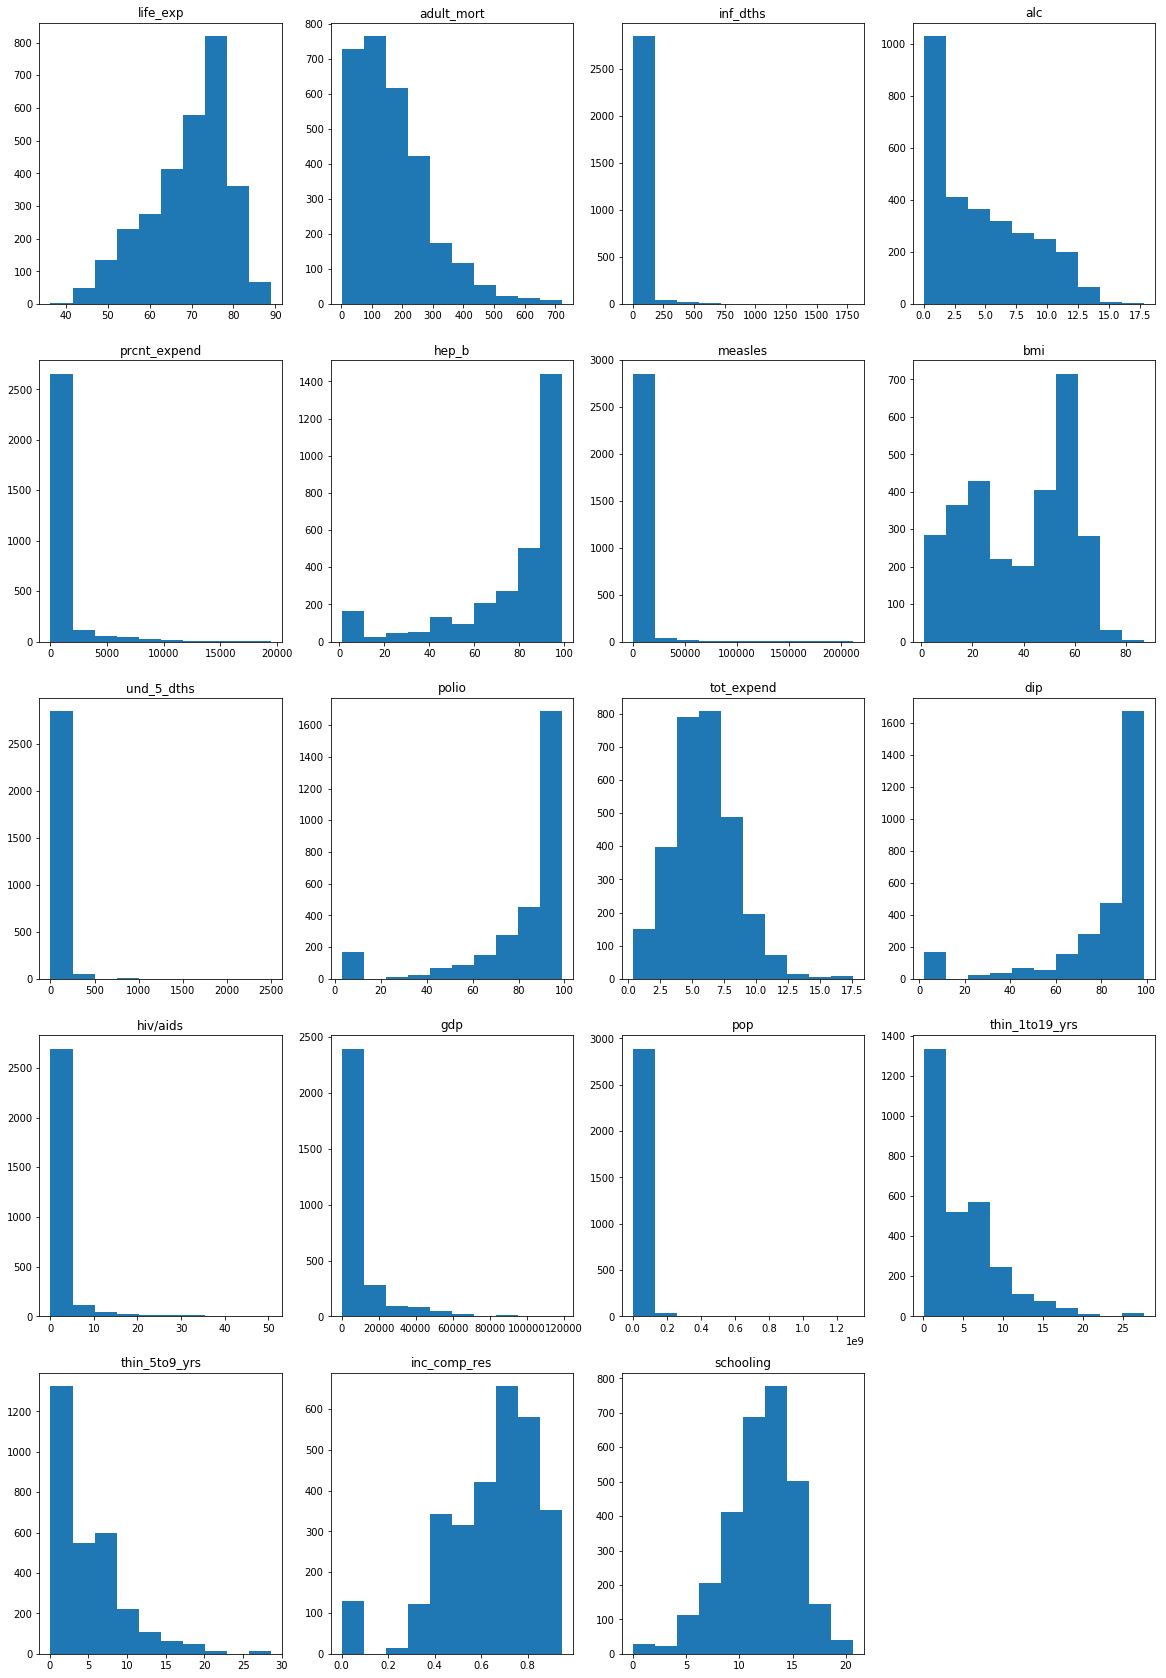

In [23]:
# Create a dictionary of columns.
dic_col = {'life_exp':1, 'adult_mort':2, 'inf_dths':3, 'alc':4,
       'prcnt_expend':5, 'hep_b':6, 'measles':7, 'bmi':8, 'und_5_dths':9, 'polio':10,
       'tot_expend':11, 'dip':12, 'hiv/aids':13, 'gdp':14, 'pop':15, 'thin_1to19_yrs':16,
       'thin_5to9_yrs':17, 'inc_comp_res':18, 'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in dic_col.items():
    plt.subplot(5,4,i)
    plt.hist(df_le[variable])
    plt.title(variable)

In [24]:
df_le.describe()

yrs     life_exp   adult_mort     inf_dths          alc  \
count  2936.000000  2936.000000  2936.000000  2936.000000  2936.000000   
mean   2007.514986    69.219173   164.845595    30.324591     4.554159   
std       4.613193     9.511517   124.126133   117.964020     3.993567   
min    2000.000000    36.300000     1.000000     0.000000     0.010000   
25%    2004.000000    63.175000    74.000000     0.000000     0.917500   
50%    2008.000000    72.000000   144.000000     3.000000     3.707500   
75%    2012.000000    75.600000   227.000000    22.000000     7.552500   
max    2015.000000    89.000000   723.000000  1800.000000    17.870000   

       prcnt_expend        hep_b        measles          bmi   und_5_dths  \
count   2936.000000  2936.000000    2936.000000  2936.000000  2936.000000   
mean     738.754191    78.524693    2421.240463    38.293495    42.064373   
std     1988.498610    25.188903   11471.004894    19.995091   160.496452   
min        0.000000     1.000000       0.000000     1.000000     0.000000   
25%        4.768003    71.000000       0.000000    19.300000     0.000000   
50%       65.268121    89.000000      17.000000    43.250000     4.000000   
75%      441.977840    96.000000     361.250000    56.100000    28.000000   
max    19479.911610    99.000000  212183.000000    87.300000  2500.000000   

             polio   tot_expend          dip     hiv/aids            gdp  \
count  2936.000000  2936.000000  2936.000000  2936.000000    2936.000000   
mean     82.473604     5.941419    82.244891     1.743222    7438.724923   
std      23.425361     2.446128    23.710462     5.079333   13414.702352   
min       3.000000     0.370000     2.000000     0.100000       1.681350   
25%      78.000000     4.317500    78.000000     0.100000     553.183093   
50%      93.000000     5.760000    93.000000     0.100000    2194.530250   
75%      97.000000     7.440000    97.000000     0.800000    7190.672832   
max      99.000000    17.600000    99.000000    50.600000  119172.741800   

                pop  thin_1to19_yrs  thin_5to9_yrs  inc_comp_res    schooling  
count  2.936000e+03     2936.000000    2936.000000   2936.000000  2936.000000  
mean   1.228536e+07        4.884230       4.922411      0.634471    12.075732  
std    5.473584e+07        4.434203       4.533362      0.209616     3.342547  
min    3.400000e+01        0.100000       0.100000      0.000000     0.000000  
25%    2.539438e+05        1.600000       1.600000      0.500000    10.200000  
50%    1.574070e+06        3.400000       3.400000      0.684000    12.400000  
75%    8.199150e+06        7.200000       7.300000      0.791138    14.300000  
max    1.293859e+09       27.700000      28.600000      0.948000    20.700000

In [25]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

dic_col = {'life_exp':1, 'adult_mort':2, 'inf_dths':3, 'alc':4,
       'prcnt_expend':5, 'hep_b':6, 'measles':7, 'bmi':8, 'und_5_dths':9, 'polio':10,
       'tot_expend':11, 'dip':12, 'hiv/aids':13, 'gdp':14, 'pop':15, 'thin_1to19_yrs':16,
       'thin_5to9_yrs':17, 'inc_comp_res':18, 'schooling':19}

for variable in dic_col.keys():
    q75, q25 = np.percentile(df_le[variable], [75 ,25])
    iqr = q75 - q25
    print('q75: {} \nq25: {}\niqr: {}\n'.format(q75, q25, iqr))

q75: 75.6 
q25: 63.175000000000004
iqr: 12.42499999999999

q75: 227.0 
q25: 74.0
iqr: 153.0

q75: 22.0 
q25: 0.0
iqr: 22.0

q75: 7.552499999999999 
q25: 0.9175000000000001
iqr: 6.634999999999999

q75: 441.977840025 
q25: 4.768002555000001
iqr: 437.20983746999997

q75: 96.0 
q25: 71.0
iqr: 25.0

q75: 361.25 
q25: 0.0
iqr: 361.25

q75: 56.1 
q25: 19.3
iqr: 36.8

q75: 28.0 
q25: 0.0
iqr: 28.0

q75: 97.0 
q25: 78.0
iqr: 19.0

q75: 7.44 
q25: 4.3175
iqr: 3.1225000000000005

q75: 97.0 
q25: 78.0
iqr: 19.0

q75: 0.8 
q25: 0.1
iqr: 0.7000000000000001

q75: 7190.672831750001 
q25: 553.1830930250001
iqr: 6637.489738725001

q75: 8199149.5 
q25: 253943.79411764705
iqr: 7945205.705882353

q75: 7.2 
q25: 1.6
iqr: 5.6

q75: 7.3 
q25: 1.6
iqr: 5.699999999999999

q75: 0.7911377551020407 
q25: 0.5
iqr: 0.29113775510204065

q75: 14.3 
q25: 10.2
iqr: 4.100000000000001



In [26]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

dic_col = {'life_exp':1, 'adult_mort':2, 'inf_dths':3, 'alc':4,
       'prcnt_expend':5, 'hep_b':6, 'measles':7, 'bmi':8, 'und_5_dths':9, 'polio':10,
       'tot_expend':11, 'dip':12, 'hiv/aids':13, 'gdp':14, 'pop':15, 'thin_1to19_yrs':16,
       'thin_5to9_yrs':17, 'inc_comp_res':18, 'schooling':19}

for variable in dic_col.keys():
    q75, q25 = np.percentile(df_le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".
          format(variable,len((np.where((df_le[variable] > max_val) | 
        (df_le[variable] < min_val))[0])),
        len((np.where((df_le[variable] > max_val) | 
        (df_le[variable] < min_val))[0]))*100/1987))
    


Number of outliers and percentage of it in life_exp : 14 and 0.704579768495219
Number of outliers and percentage of it in adult_mort : 86 and 4.3281328636134875
Number of outliers and percentage of it in inf_dths : 315 and 15.853044791142425
Number of outliers and percentage of it in alc : 1 and 0.050327126321087066
Number of outliers and percentage of it in prcnt_expend : 389 and 19.577252138902868
Number of outliers and percentage of it in hep_b : 248 and 12.481127327629592
Number of outliers and percentage of it in measles : 542 and 27.27730246602919
Number of outliers and percentage of it in bmi : 0 and 0.0
Number of outliers and percentage of it in und_5_dths : 394 and 19.828887770508302
Number of outliers and percentage of it in polio : 282 and 14.192249622546553
Number of outliers and percentage of it in tot_expend : 35 and 1.7614494212380474
Number of outliers and percentage of it in dip : 301 and 15.148465022647207
Number of outliers and percentage of it in hiv/aids : 542 and 

In [27]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  
0         0.479       10.1  
1         0.476       10.0  
2         0.470        9.9  
3         0.463        9.8  
4         0.454        9.5

Text(0.5, 1.0, 'WINSORIZED LIFE EXPENTANCY')

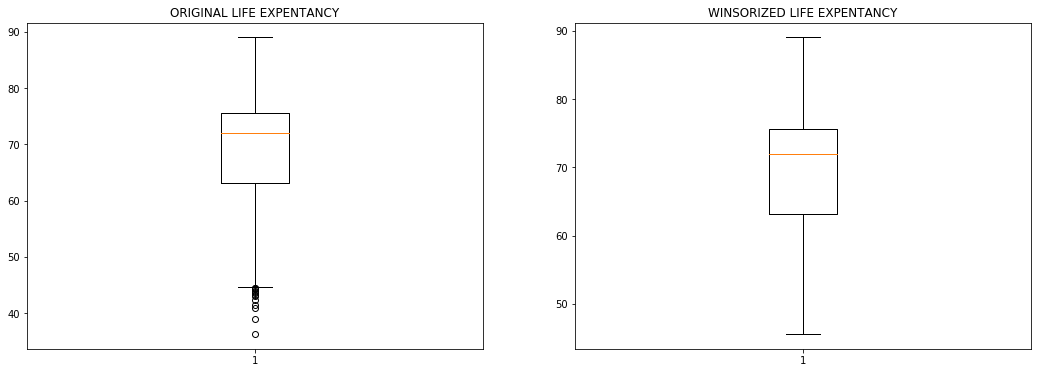

In [28]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Life_Expectancy
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.boxplot(df_le["life_exp"])
plt.title("ORIGINAL LIFE EXPENTANCY")

plt.subplot(1,2,2)
winsorized_life_expentancy = winsorize(df_le["life_exp"], (0.01, 0))
plt.boxplot(winsorized_life_expentancy)
plt.title('WINSORIZED LIFE EXPENTANCY')

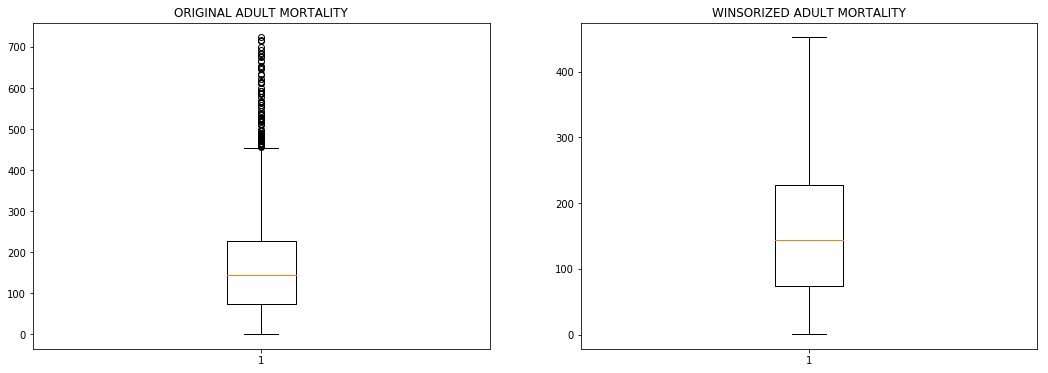

In [29]:
# Winsorize Adult_Mortality
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df_le['adult_mort']
plt.boxplot(original_Adult_Mortality)
plt.title("ORIGINAL ADULT MORTALITY")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df_le['adult_mort'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("WINSORIZED ADULT MORTALITY")

plt.show()

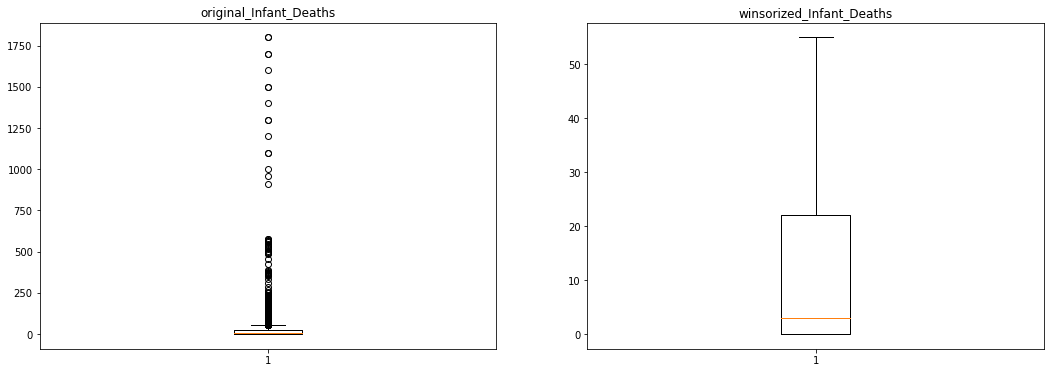

In [30]:
# Winsorize Infant_Deaths
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df_le['inf_dths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df_le['inf_dths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

Text(0.5, 1.0, 'WINSORIZED ALCOHOL')

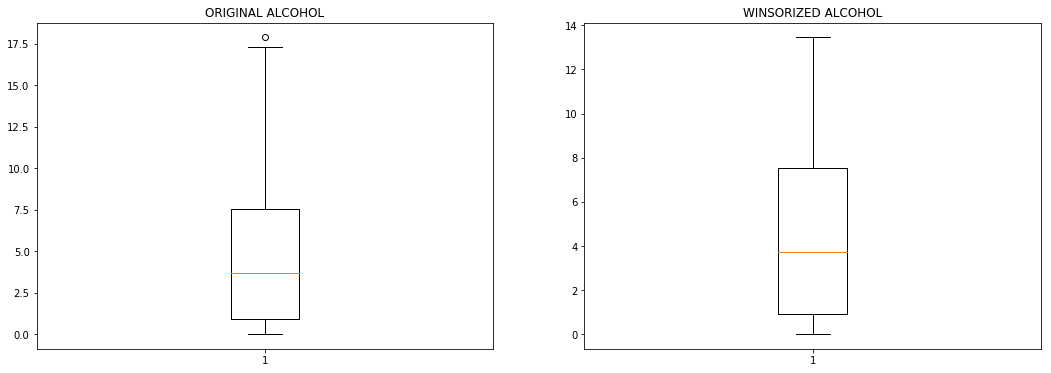

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.boxplot(df_le['alc'])
plt.title('ORIGINAL ALCOHOL')

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df_le['alc'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title('WINSORIZED ALCOHOL')

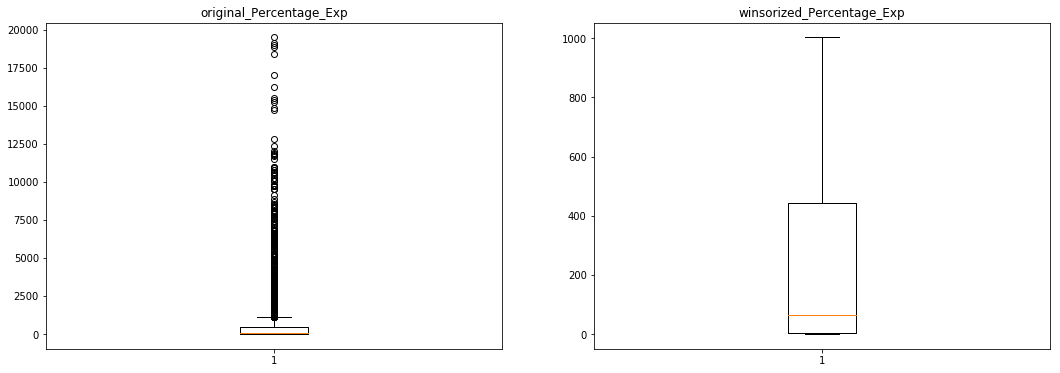

In [32]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df_le['prcnt_expend']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df_le['prcnt_expend'],(0,0.14))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

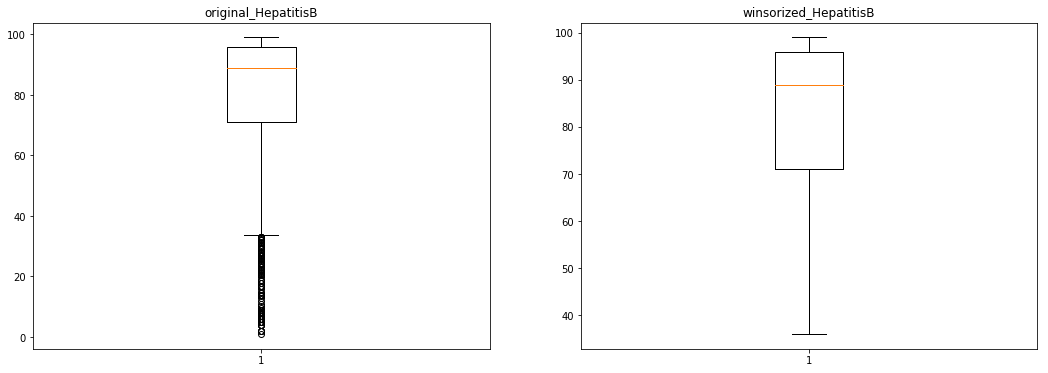

In [33]:
# Winsorize HepatitisB
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df_le['hep_b']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df_le['hep_b'],(0.09,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

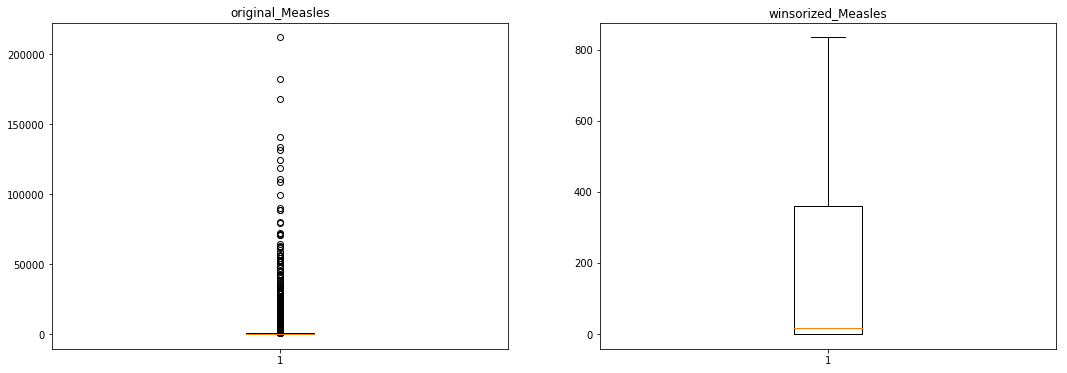

In [34]:
### Winsorize Measles
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df_le['measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df_le['measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

### Winsorization changes 19% of the data, which may not give better results. Hence drop this column.

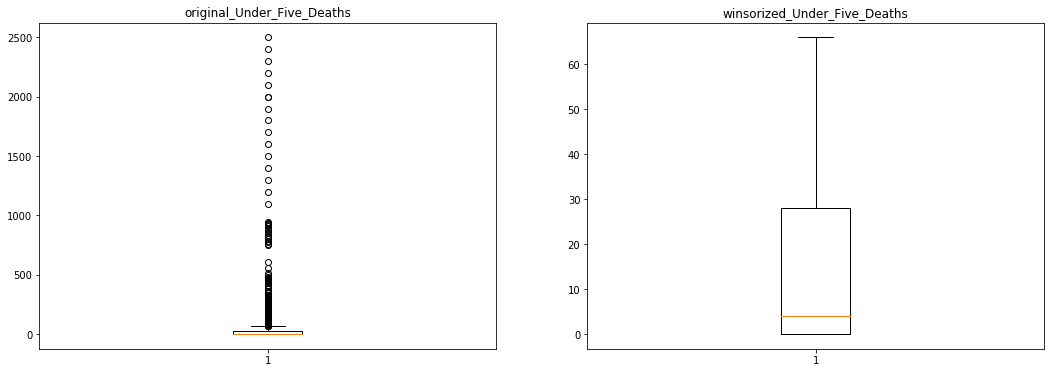

In [35]:
# Winsorize Under_Five_Deaths
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df_le['und_5_dths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df_le['und_5_dths'],(0,0.14))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

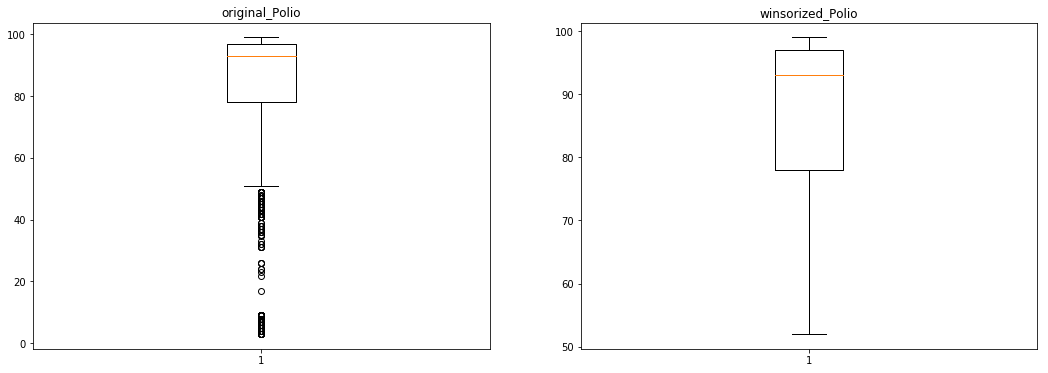

In [36]:
# Winsorize Polio
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df_le['polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df_le['polio'],(0.10,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

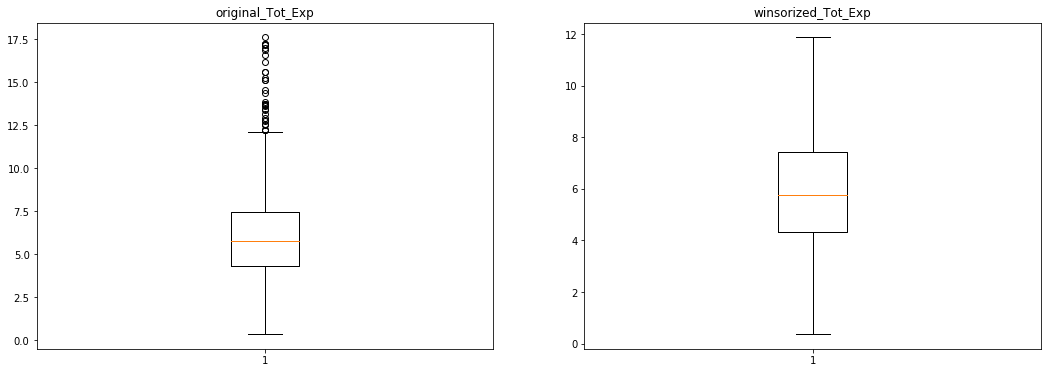

In [37]:
# Winsorize Tot_Exp
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df_le['tot_expend']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df_le['tot_expend'],(0,0.015))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

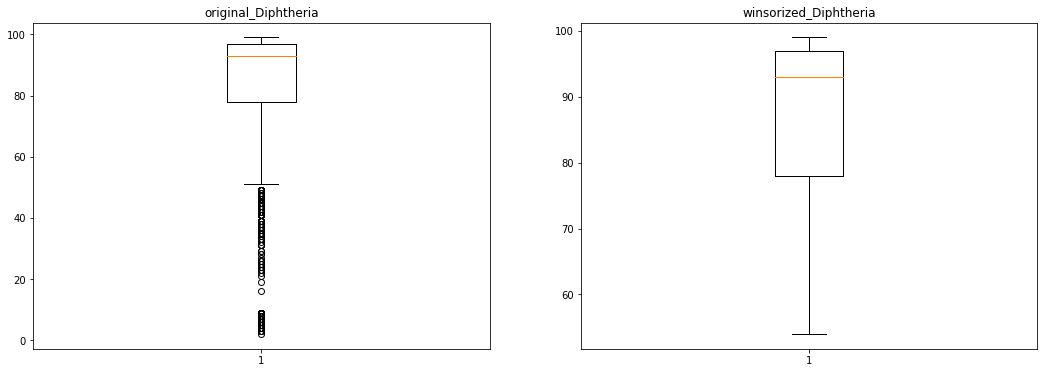

In [38]:
# Winsorize Diphtheria
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df_le['dip']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df_le['dip'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

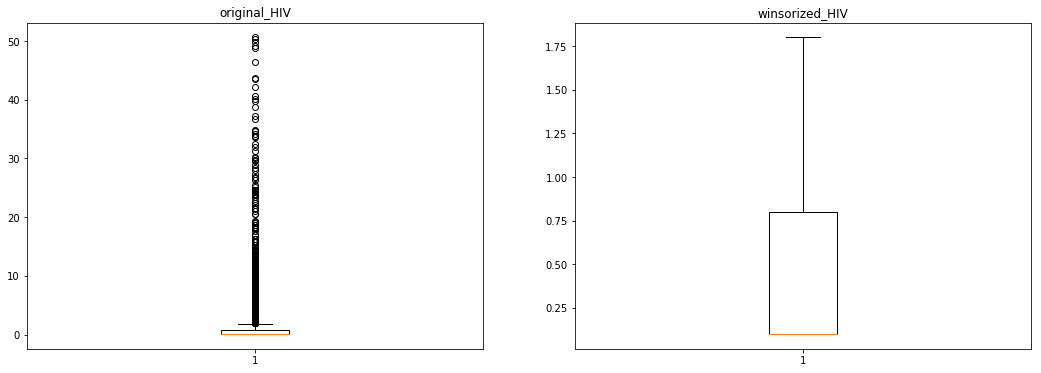

In [39]:
# Winsorize HIV/AIDS
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df_le['hiv/aids']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df_le['hiv/aids'],(0,0.185))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

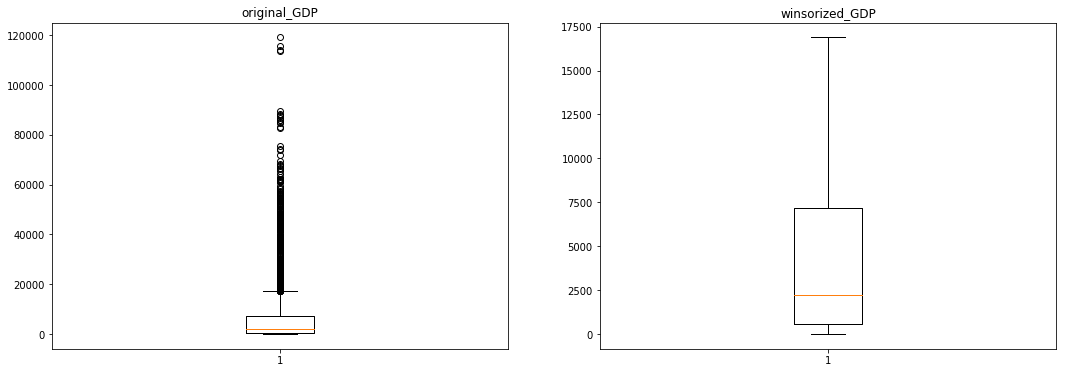

In [40]:
# Winsorize GDP
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df_le['gdp']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df_le['gdp'],(0,0.12))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

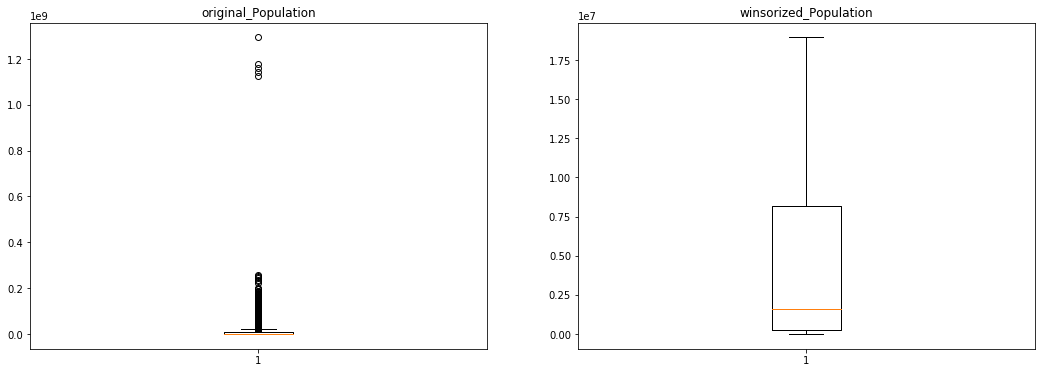

In [41]:
# Winsorize Population
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df_le['pop']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df_le['pop'],(0,0.13))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

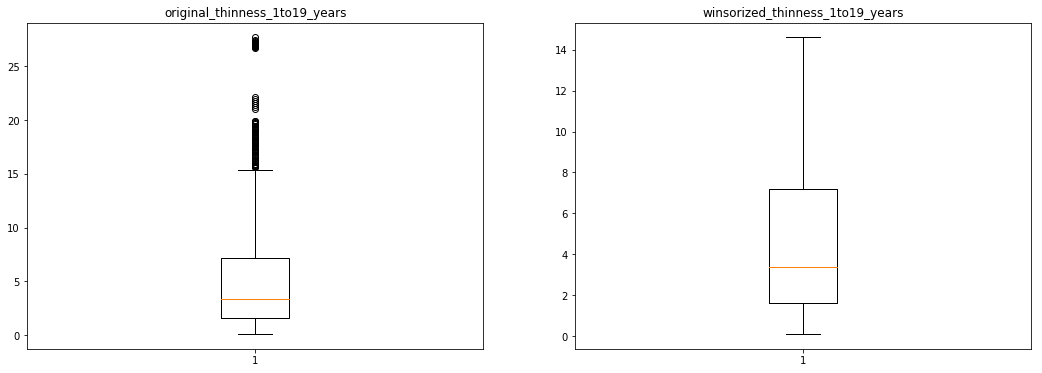

In [42]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df_le['thin_1to19_yrs']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df_le['thin_1to19_yrs'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

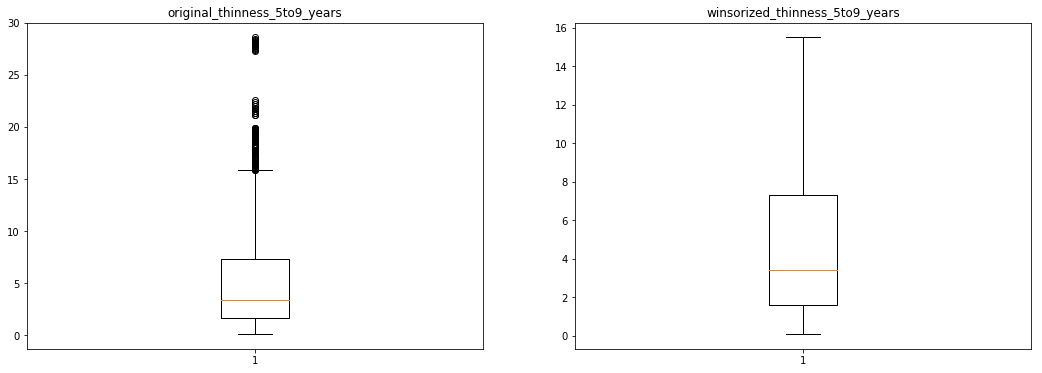

In [43]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df_le['thin_5to9_yrs']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df_le['thin_5to9_yrs'],(0,0.035))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

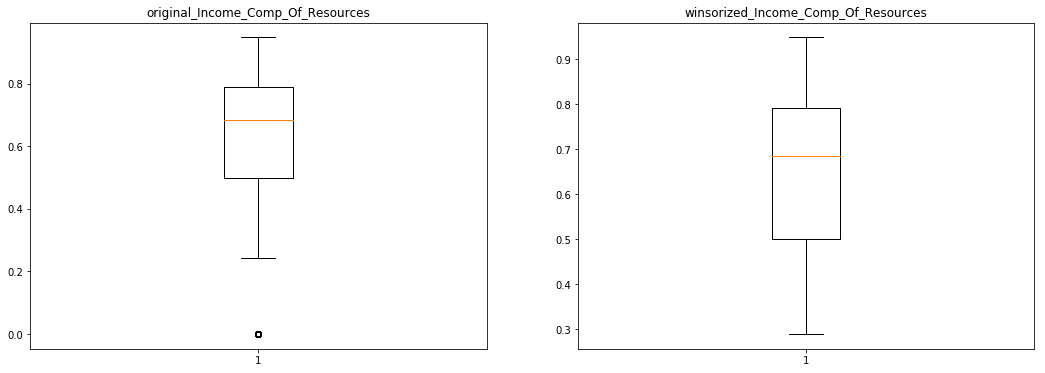

In [44]:
# Winsorize Income_Comp_Of_Resources
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df_le['inc_comp_res']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df_le['inc_comp_res'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

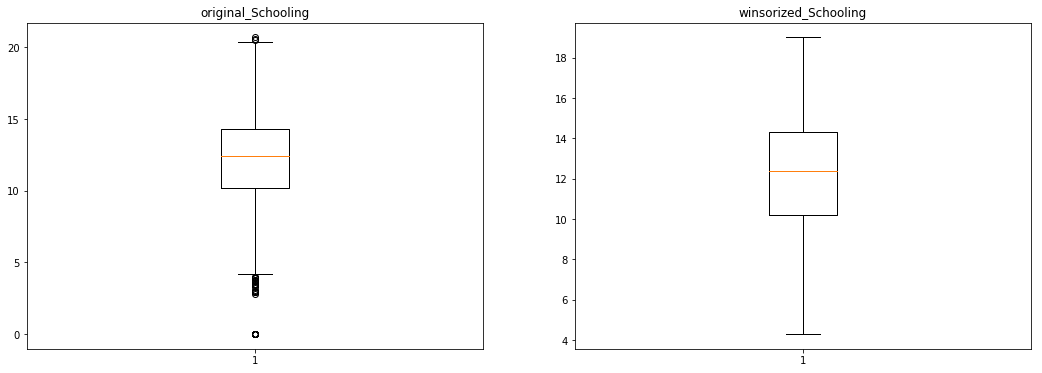

In [45]:
##### Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df_le['schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df_le['schooling'],(0.018,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [46]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_life_expentancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,
            winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,
            winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,
            winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | 
                                                                            (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [47]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_life_expentancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,
            winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,
            winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,
            winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    print(variable)

[65.  59.9 59.9 ... 45.6 45.6 46. ]
[263. 271. 268. ...  73. 452. 452.]
[55 55 55 ... 25 25 24]
[0.01 0.01 0.01 ... 4.43 1.72 1.68]
[71.27962362 73.52358168 73.21924272 ...  0.          0.
  0.        ]
[65. 62. 64. ... 73. 76. 79.]
[66 66 66 ... 40 39 39]
[52. 58. 62. ... 73. 76. 78.]
[8.16 8.18 8.13 ... 6.53 6.16 7.1 ]
[65. 62. 64. ... 71. 75. 78.]
[0.1 0.1 0.1 ... 1.8 1.8 1.8]
[584.25921   612.696514  631.744976  ...  57.34834   548.587312
 547.3588785]
[18938762.   327582. 18938762. ...   125525. 12366165. 12222251.]
[14.60588235 14.60588235 14.60588235 ...  1.2         1.6
 11.        ]
[15.5 15.5 15.5 ...  1.3  1.7 11.2]
[0.479 0.476 0.47  ... 0.427 0.427 0.434]
[10.1 10.   9.9 ... 10.   9.8  9.8]


In [48]:
# Adding winsorized variables to the data frame.
df_le['winso_life_exp'] = winsorized_life_expentancy
df_le['winso_adult_mort'] = winsorized_Adult_Mortality
df_le['winso_inf_dths'] = winsorized_Infant_Deaths
df_le['winso_alc'] = winsorized_Alcohol
df_le['winso_prcnt_expend'] = winsorized_Percentage_Exp
df_le['winso_hep_b'] = winsorized_HepatitisB
df_le['winso_und_5_dths'] = winsorized_Under_Five_Deaths
df_le['winso_polio'] = winsorized_Polio
df_le['winso_tot_exp'] = winsorized_Tot_Exp
df_le['winso_dip'] = winsorized_Diphtheria
df_le['winso_hiv/aids'] = winsorized_HIV
df_le['winso_gdp'] = winsorized_GDP
df_le['winso_Pop'] = winsorized_Population
df_le['winso_thin_1to19_yrs'] = winsorized_thinness_1to19_years
df_le['winso_thin_5to9_yrs'] = winsorized_thinness_5to9_years
df_le['winso_inc_comp_res'] = winsorized_Income_Comp_Of_Resources
df_le['winso_Schooling'] = winsorized_Schooling


In [49]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling', 'winso_life_exp',
       'winso_adult_mort', 'winso_inf_dths', 'winso_alc', 'winso_prcnt_expend',
       'winso_hep_b', 'winso_und_5_dths', 'winso_polio', 'winso_tot_exp',
       'winso_dip', 'winso_hiv/aids', 'winso_gdp', 'winso_Pop',
       'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs', 'winso_inc_comp_res',
       'winso_Schooling'],
      dtype='object')

# Exploratory Analysis:

# Univariate analysis

A typical dataset consists of several variables. The first step in data exploration is to investigate each variable at a time. This is called  **univariate analysis**. In a univariate analysis, we aim to answer questions like:


* <font color=green>How many variables do we have</font>?
* <font color=green>How many datapoints are there in the dataset</font>?
* <font color=green>Which variables are continuous and which are categorical</font>?
* <font color=green>Are there any missing data? If so, how much</font>?
* Do any of the variables have a known probability distribution (normal, Poisson, Gamma, etc)?
* What are the central tendencies of the each of the variables?
* How much variance is there in each of the variables?

Why are some of these bullet points green? It's because we covered them in the previous checkpoint! Since we already learned how to answer those, here we move to how to answer the next three questions.

In our conceptualization, data exploration is the process of applying statistics and visualization techniques to uncover the hidden information in data. In this process, not only do we begin to discover useful features, but we also learn to ask the right questions about the data. In this respect, we can think of data exploration as a dialogue between the data scientist and the data where the data speaks for itself.

In the data exploration phase, we:

investigate the properties of variables in our dataset
discover associations between the variables
discover useful features that may help us to explain our target variables
test for assumptions in the data.

Let's continue exploring the YouTube dataset from the previous checkpoint. We'll first set up our environment and then clean the data using the methods described in the previous checkpoint: 

### Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect the life expectancy.

In [50]:
# Descriptive statistics of continuous variables.
df_le.describe()

yrs     life_exp   adult_mort     inf_dths          alc  \
count  2936.000000  2936.000000  2936.000000  2936.000000  2936.000000   
mean   2007.514986    69.219173   164.845595    30.324591     4.554159   
std       4.613193     9.511517   124.126133   117.964020     3.993567   
min    2000.000000    36.300000     1.000000     0.000000     0.010000   
25%    2004.000000    63.175000    74.000000     0.000000     0.917500   
50%    2008.000000    72.000000   144.000000     3.000000     3.707500   
75%    2012.000000    75.600000   227.000000    22.000000     7.552500   
max    2015.000000    89.000000   723.000000  1800.000000    17.870000   

       prcnt_expend        hep_b        measles          bmi   und_5_dths  \
count   2936.000000  2936.000000    2936.000000  2936.000000  2936.000000   
mean     738.754191    78.524693    2421.240463    38.293495    42.064373   
std     1988.498610    25.188903   11471.004894    19.995091   160.496452   
min        0.000000     1.000000       0.000000     1.000000     0.000000   
25%        4.768003    71.000000       0.000000    19.300000     0.000000   
50%       65.268121    89.000000      17.000000    43.250000     4.000000   
75%      441.977840    96.000000     361.250000    56.100000    28.000000   
max    19479.911610    99.000000  212183.000000    87.300000  2500.000000   

             polio   tot_expend          dip     hiv/aids            gdp  \
count  2936.000000  2936.000000  2936.000000  2936.000000    2936.000000   
mean     82.473604     5.941419    82.244891     1.743222    7438.724923   
std      23.425361     2.446128    23.710462     5.079333   13414.702352   
min       3.000000     0.370000     2.000000     0.100000       1.681350   
25%      78.000000     4.317500    78.000000     0.100000     553.183093   
50%      93.000000     5.760000    93.000000     0.100000    2194.530250   
75%      97.000000     7.440000    97.000000     0.800000    7190.672832   
max      99.000000    17.600000    99.000000    50.600000  119172.741800   

                pop  thin_1to19_yrs  thin_5to9_yrs  inc_comp_res    schooling  \
count  2.936000e+03     2936.000000    2936.000000   2936.000000  2936.000000   
mean   1.228536e+07        4.884230       4.922411      0.634471    12.075732   
std    5.473584e+07        4.434203       4.533362      0.209616     3.342547   
min    3.400000e+01        0.100000       0.100000      0.000000     0.000000   
25%    2.539438e+05        1.600000       1.600000      0.500000    10.200000   
50%    1.574070e+06        3.400000       3.400000      0.684000    12.400000   
75%    8.199150e+06        7.200000       7.300000      0.791138    14.300000   
max    1.293859e+09       27.700000      28.600000      0.948000    20.700000   

       winso_life_exp  winso_adult_mort  winso_inf_dths    winso_alc  \
count     2936.000000       2936.000000     2936.000000  2936.000000   
mean        69.236203        161.938578       13.644414     4.540743   
std          9.465298        115.191546       19.112121     3.959531   
min         45.600000          1.000000        0.000000     0.010000   
25%         63.175000         74.000000        0.000000     0.917500   
50%         72.000000        144.000000        3.000000     3.707500   
75%         75.600000        227.000000       22.000000     7.552500   
max         89.000000        452.000000       55.000000    13.450000   

       winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
count         2936.000000  2936.000000       2936.000000  2936.000000   
mean           271.419236    80.460598         17.429837    85.471171   
std            363.226960    20.391131         24.079168    15.332912   
min              0.000000    36.000000          0.000000    52.000000   
25%              4.768003    71.000000          0.000000    78.000000   
50%             65.268121    89.000000          4.000000    93.000000   
75%            441.977840    96.000000         28.000000    97.000000   
max   

In [51]:
# descriptive statistics for just text-based variables
df_le.describe(include=['O'])

cntry      status
count         2936        2936
unique         191           2
top     Seychelles  Developing
freq            16        2424

In [52]:
# descriptive statistics for all variables
df_le.describe(include= 'all')

cntry          yrs      status     life_exp   adult_mort  \
count         2936  2936.000000        2936  2936.000000  2936.000000   
unique         191          NaN           2          NaN          NaN   
top     Seychelles          NaN  Developing          NaN          NaN   
freq            16          NaN        2424          NaN          NaN   
mean           NaN  2007.514986         NaN    69.219173   164.845595   
std            NaN     4.613193         NaN     9.511517   124.126133   
min            NaN  2000.000000         NaN    36.300000     1.000000   
25%            NaN  2004.000000         NaN    63.175000    74.000000   
50%            NaN  2008.000000         NaN    72.000000   144.000000   
75%            NaN  2012.000000         NaN    75.600000   227.000000   
max            NaN  2015.000000         NaN    89.000000   723.000000   

           inf_dths          alc  prcnt_expend        hep_b        measles  \
count   2936.000000  2936.000000   2936.000000  2936.000000    2936.000000   
unique          NaN          NaN           NaN          NaN            NaN   
top             NaN          NaN           NaN          NaN            NaN   
freq            NaN          NaN           NaN          NaN            NaN   
mean      30.324591     4.554159    738.754191    78.524693    2421.240463   
std      117.964020     3.993567   1988.498610    25.188903   11471.004894   
min        0.000000     0.010000      0.000000     1.000000       0.000000   
25%        0.000000     0.917500      4.768003    71.000000       0.000000   
50%        3.000000     3.707500     65.268121    89.000000      17.000000   
75%       22.000000     7.552500    441.977840    96.000000     361.250000   
max     1800.000000    17.870000  19479.911610    99.000000  212183.000000   

                bmi   und_5_dths        polio   tot_expend          dip  \
count   2936.000000  2936.000000  2936.000000  2936.000000  2936.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      38.293495    42.064373    82.473604     5.941419    82.244891   
std       19.995091   160.496452    23.425361     2.446128    23.710462   
min        1.000000     0.000000     3.000000     0.370000     2.000000   
25%       19.300000     0.000000    78.000000     4.317500    78.000000   
50%       43.250000     4.000000    93.000000     5.760000    93.000000   
75%       56.100000    28.000000    97.000000     7.440000    97.000000   
max       87.300000  2500.000000    99.000000    17.600000    99.000000   

           hiv/aids            gdp           pop  thin_1to19_yrs  \
count   2936.000000    2936.000000  2.936000e+03     2936.000000   
unique          NaN            NaN           NaN             NaN   
top             NaN            NaN           NaN             NaN   
freq            NaN            NaN           NaN             NaN   
mean       1.743222    7438.724923  1.228536e+07        4.884230   
std        5.079333   13414.702352  5.473584e+07        4.434203   
min        0.100000       1.681350  3.400000e+01        0.100000   
25%        0.100000     553.183093  2.539438e+05        1.600000   
50%        0.100000    2194.530250  1.574070e+06        3.400000   
75%        0.800000    7190.672832  8.199150e+06        7.200000   
max       50.600000  119172.741800  1.293859e+09       27.700000   

        thin_5to9_yrs  inc_comp_res    schooling  winso_life_exp  \
count     2936.000000   2936.000000  2936.000000     2936.000000   
unique            NaN           NaN          NaN             NaN   
top               NaN           NaN          NaN             NaN   
freq              NaN           NaN          NaN             NaN   
mean         4.922411      0.634471    12.075732       69.236203   
std          4.533362      0.209616     3.342547        9.465298   
min  

In [53]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling', 'winso_life_exp',
       'winso_adult_mort', 'winso_inf_dths', 'winso_alc', 'winso_prcnt_expend',
       'winso_hep_b', 'winso_und_5_dths', 'winso_polio', 'winso_tot_exp',
       'winso_dip', 'winso_hiv/aids', 'winso_gdp', 'winso_Pop',
       'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs', 'winso_inc_comp_res',
       'winso_Schooling'],
      dtype='object')

## Univariate visualization of continuous variables

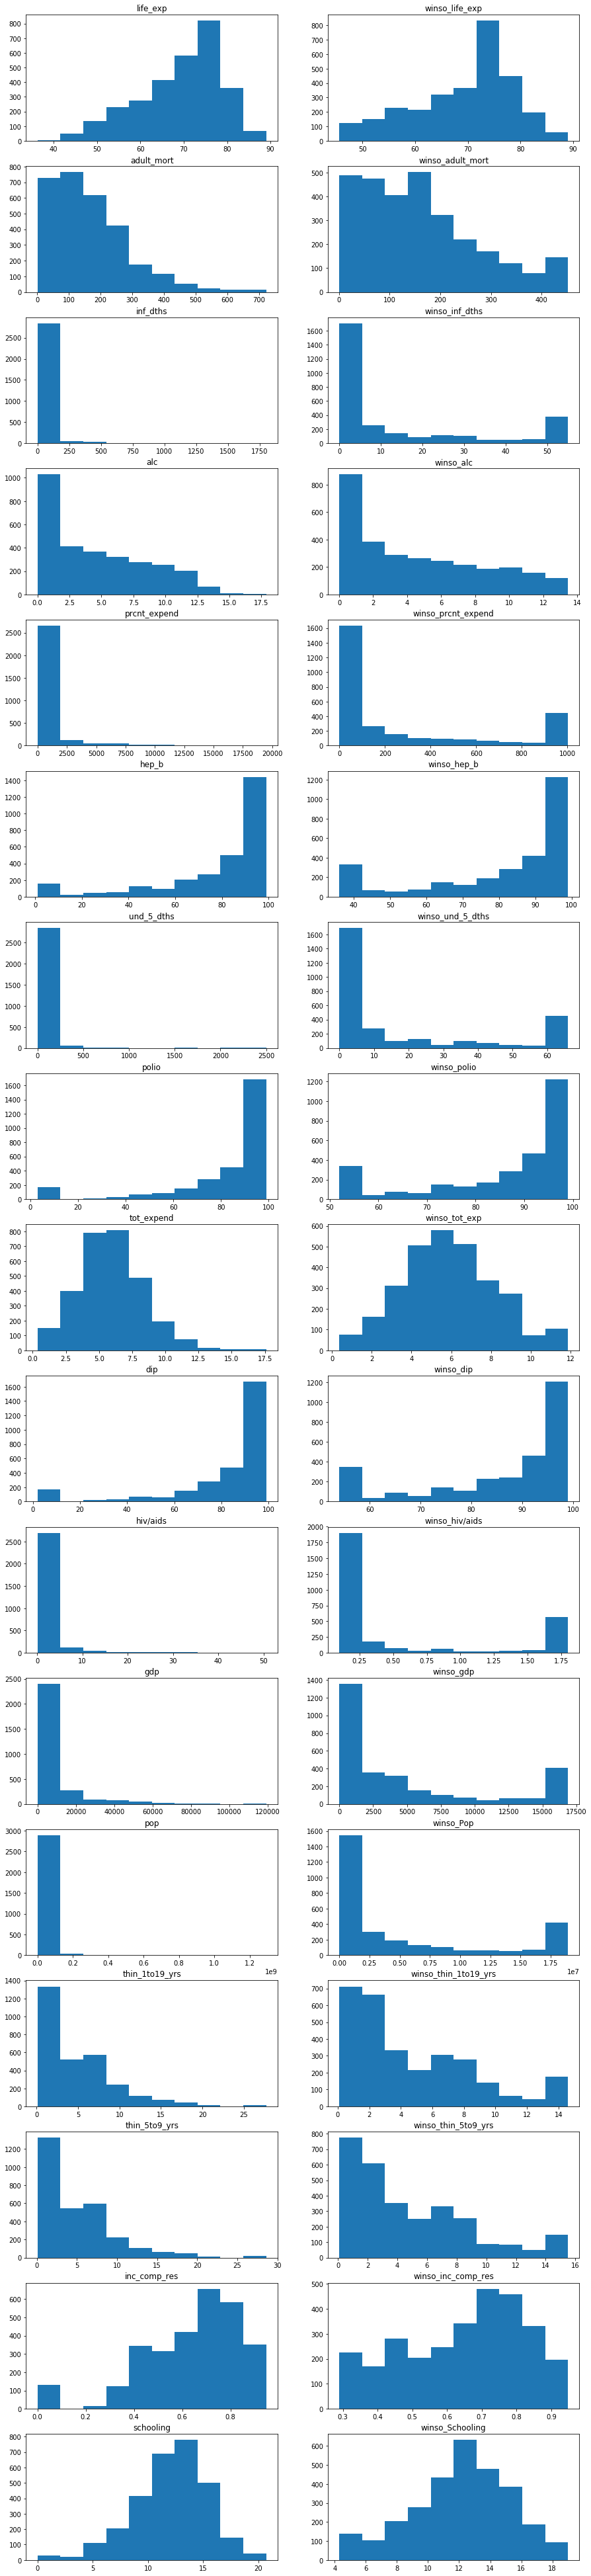

In [54]:
# Distribution of each numerical variable.
all_col = ['life_exp', 'winso_life_exp', 'adult_mort', 'winso_adult_mort', 'inf_dths', 'winso_inf_dths', 'alc','winso_alc',
           'prcnt_expend', 'winso_prcnt_expend', 'hep_b', 'winso_hep_b', 'und_5_dths', 'winso_und_5_dths', 'polio', 
           'winso_polio', 'tot_expend', 'winso_tot_exp', 'dip', 'winso_dip', 'hiv/aids', 'winso_hiv/aids', 'gdp', 'winso_gdp', 'pop', 'winso_Pop', 
        'thin_1to19_yrs', 'winso_thin_1to19_yrs','thin_5to9_yrs', 'winso_thin_5to9_yrs', 'inc_comp_res', 'winso_inc_comp_res', 'schooling', 'winso_Schooling']
          
        
          
         
plt.figure(figsize=(15,75))

for n in range(len(all_col)):
    plt.subplot(18,2, n+1)
    plt.hist(df_le[all_col[n]])
    plt.title(all_col[n])

plt.show()

### winsorized_Life_Expectancy, winsorized_Tot_Exp, winsorized_Schooling are some what normally distributed.

### Univariate visualization of categorical variables

Visualizing categorical variables is slightly different than continuous variables because categorical variables take only limited number of values. One of the most commonly used chart types for categorical features is the bar chart. Below, we draw a bar chart that shows the number of observations for each value in the *Grade* variable:

In [55]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

Text(0.5, 1.0, 'Horizontal Bar Chart of Status')

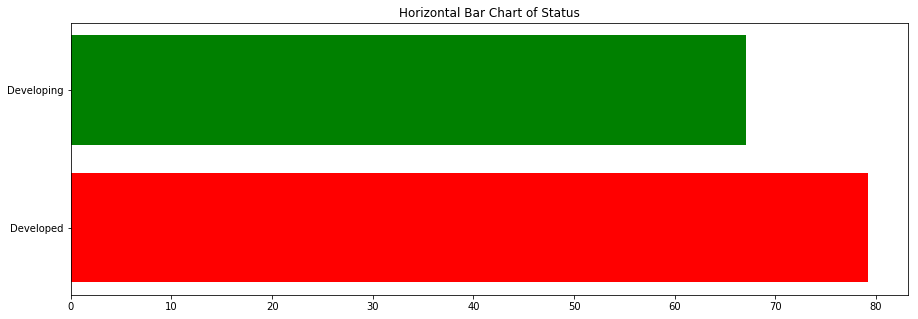

In [56]:
# bar chart of grades
plt.figure(figsize=(15, 5))
plt.barh(df_le.groupby('status').life_exp.mean().index, 
        df_le.groupby('status').life_exp.mean(), color=['red','green'])
plt.title('Horizontal Bar Chart of Status')

In [58]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

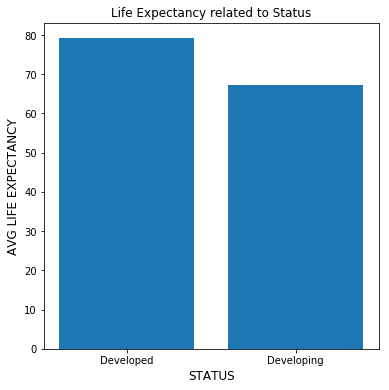

In [59]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df_le.groupby('status').status.count().index, df_le.groupby('status').winso_life_exp.mean())
plt.xlabel("STATUS", fontsize=12)
plt.ylabel("AVG LIFE EXPECTANCY", fontsize=12)
plt.title("Life Expectancy related to Status")
plt.show()

In [60]:
df_le.groupby('status').status.count()

status
Developed      512
Developing    2424
Name: status, dtype: int64

In [61]:
df_le.groupby('status').status.count().index

Index(['Developed', 'Developing'], dtype='object', name='status')

In [62]:
df_le.groupby('status')

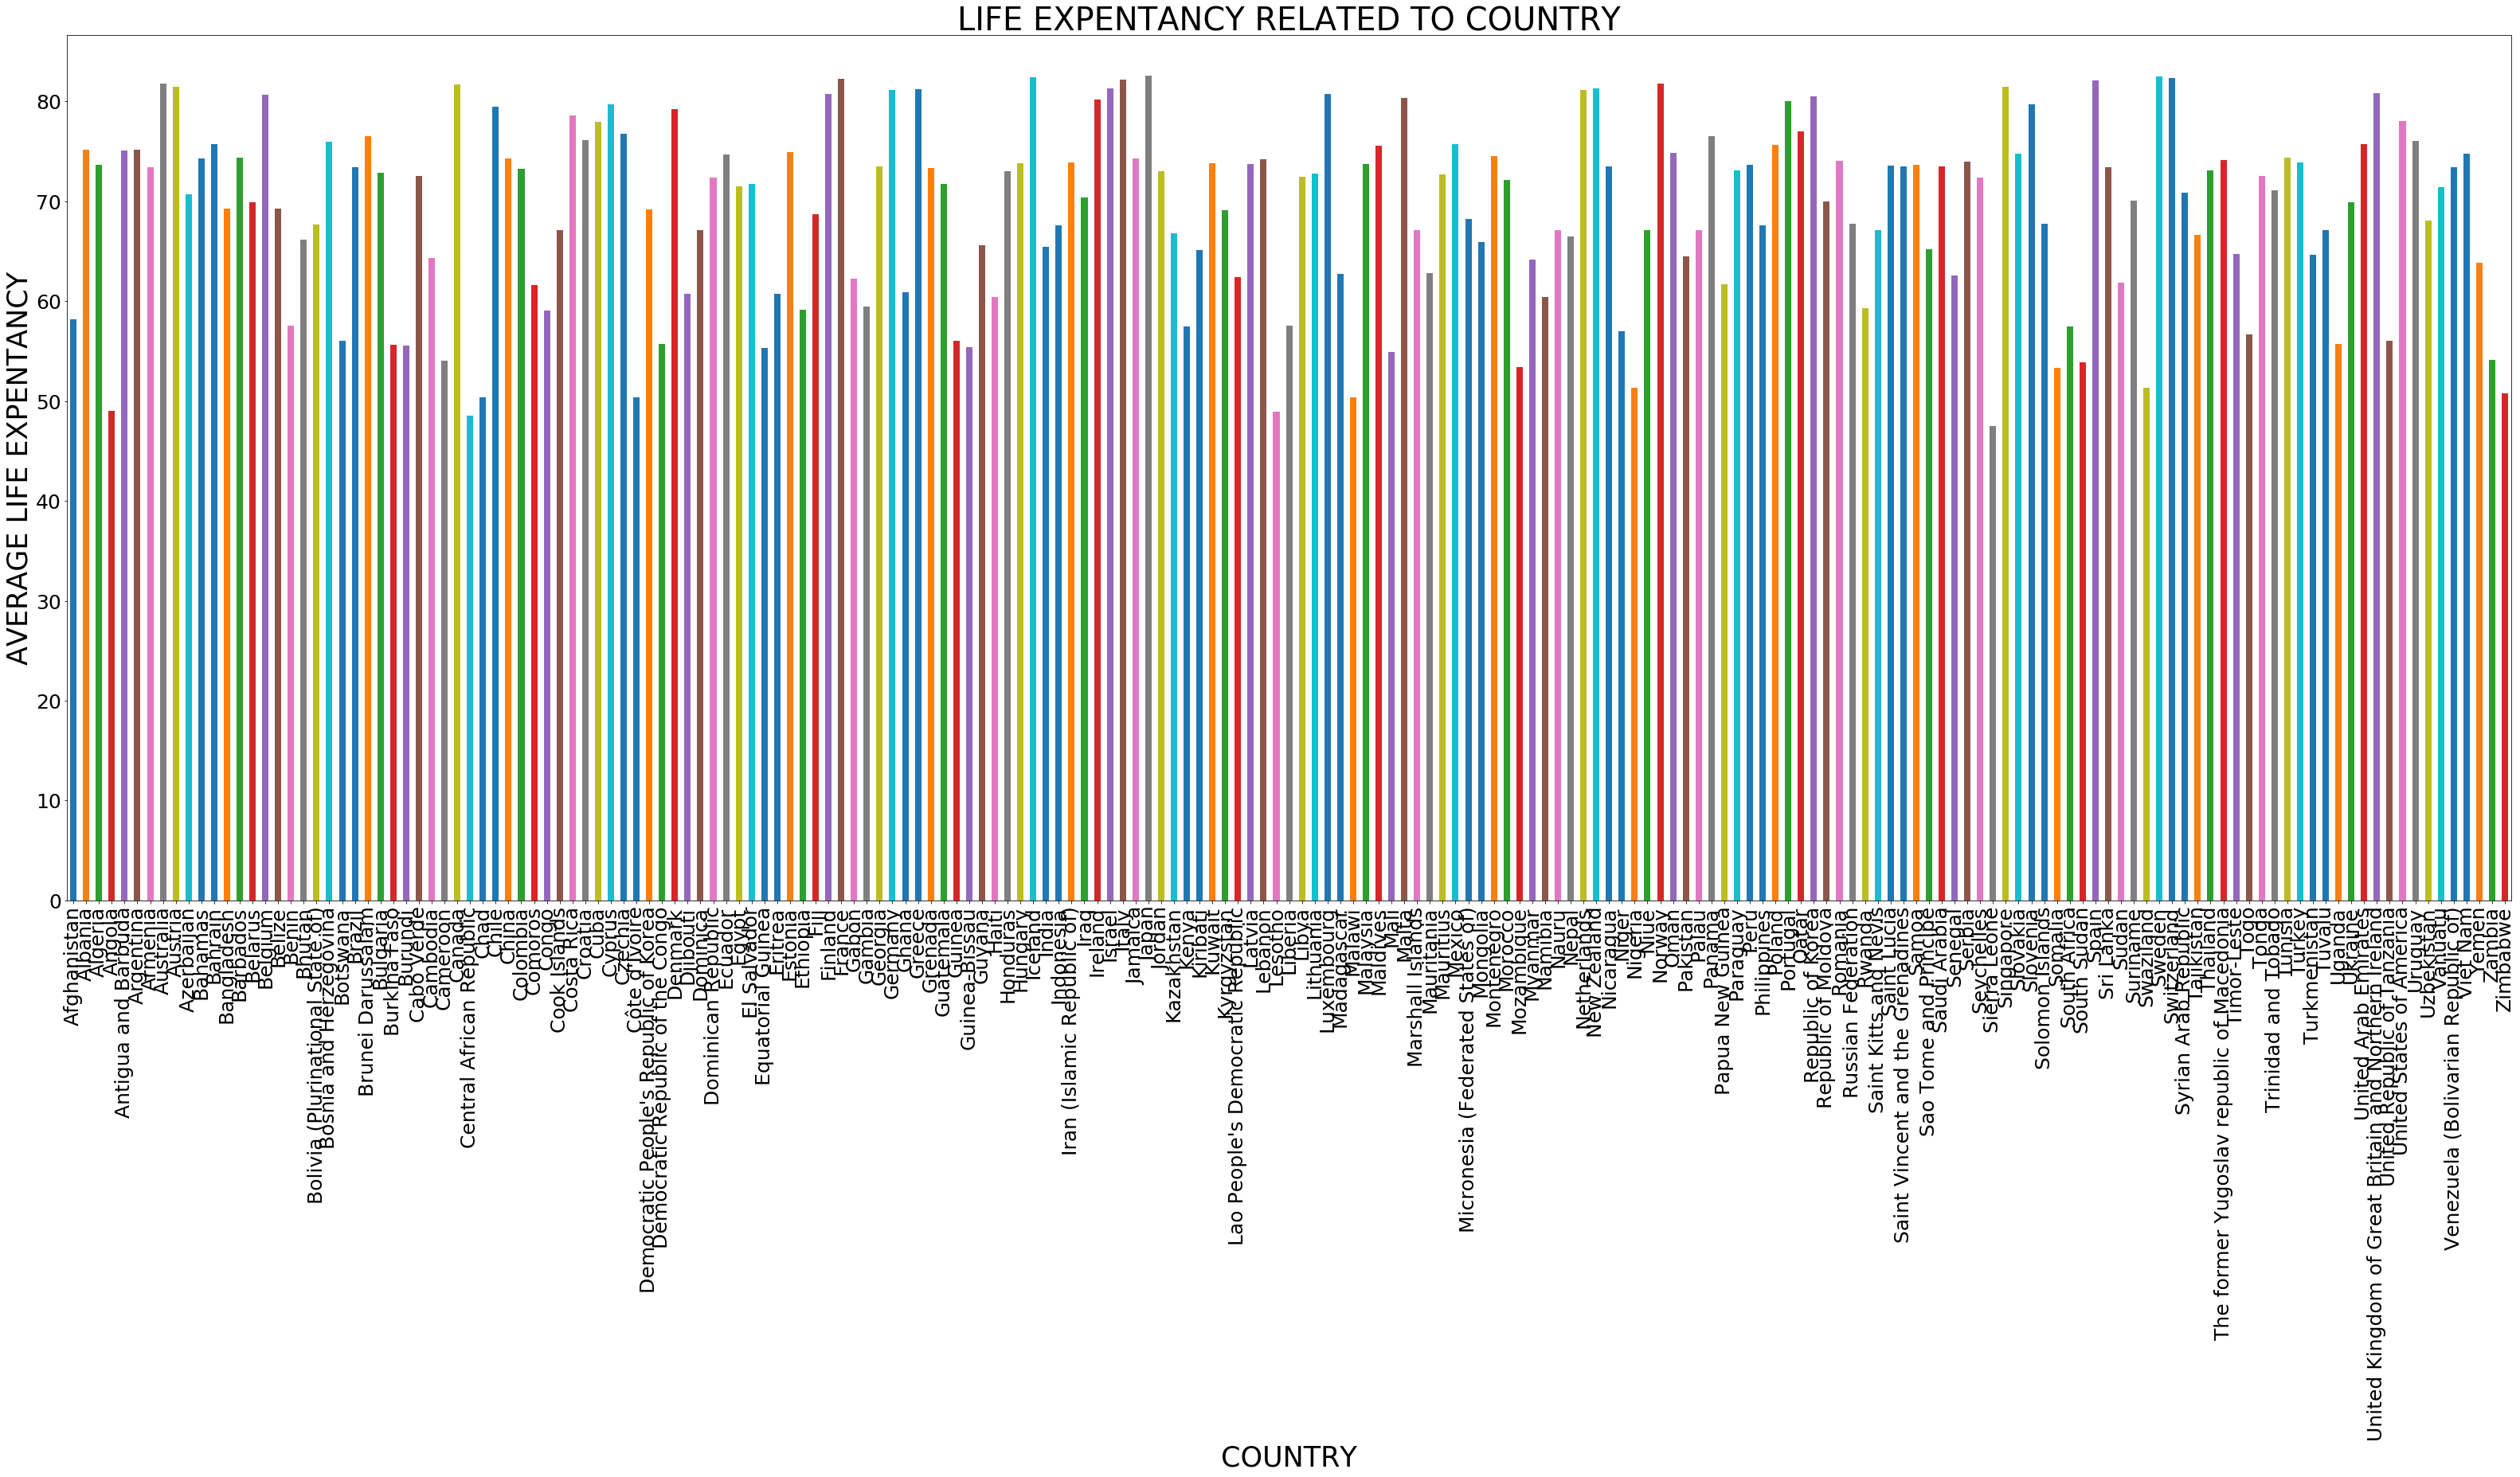

In [63]:
df_grp_cntry = df_le.groupby('cntry').winso_life_exp.mean()
df_grp_cntry.plot(kind='bar', figsize= (55, 20), fontsize=25)
plt.title('LIFE EXPENTANCY RELATED TO COUNTRY', fontsize=40)
plt.xlabel('COUNTRY', fontsize= 35)
plt.ylabel('AVERAGE LIFE EXPENTANCY', fontsize=35)
plt.show()

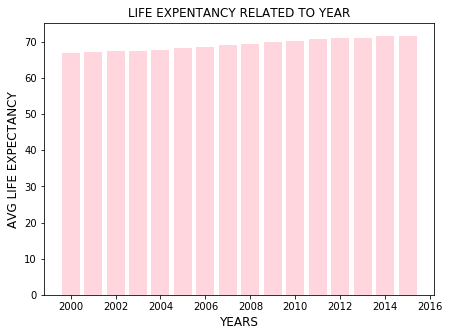

In [64]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7, 5))
plt.bar(df_le.groupby('yrs').yrs.count().index, 
        df_le.groupby('yrs').winso_life_exp.mean(), 
        color= 'pink', alpha=0.65)
plt.xlabel('YEARS', fontsize=12)
plt.ylabel('AVG LIFE EXPECTANCY', fontsize=12)
plt.title("LIFE EXPENTANCY RELATED TO YEAR")
plt.show()



In [65]:
df_le.groupby('yrs').yrs.count().index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='yrs')

In [66]:
df_le.groupby('yrs').winso_life_exp.mean()

yrs
2000    66.813115
2001    67.172678
2002    67.365027
2003    67.467760
2004    67.678689
2005    68.233333
2006    68.677596
2007    69.037705
2008    69.427869
2009    69.938251
2010    70.099454
2011    70.654098
2012    70.916940
2013    71.063307
2014    71.536612
2015    71.616940
Name: winso_life_exp, dtype: float64

# Bivariate analysis of two continuous variables

## Scatterplot

One of the most informative way of looking at the relationship between two continuous variables is to draw a scatterplot (also known as  a scattergram). For example, if we see that the first variable's value usually goes up when the second one goes up, then this indicates a positive relationship.

Let's look at this using Youtube dataset:

### Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect the life expectancy.

In [67]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling', 'winso_life_exp',
       'winso_adult_mort', 'winso_inf_dths', 'winso_alc', 'winso_prcnt_expend',
       'winso_hep_b', 'winso_und_5_dths', 'winso_polio', 'winso_tot_exp',
       'winso_dip', 'winso_hiv/aids', 'winso_gdp', 'winso_Pop',
       'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs', 'winso_inc_comp_res',
       'winso_Schooling'],
      dtype='object')

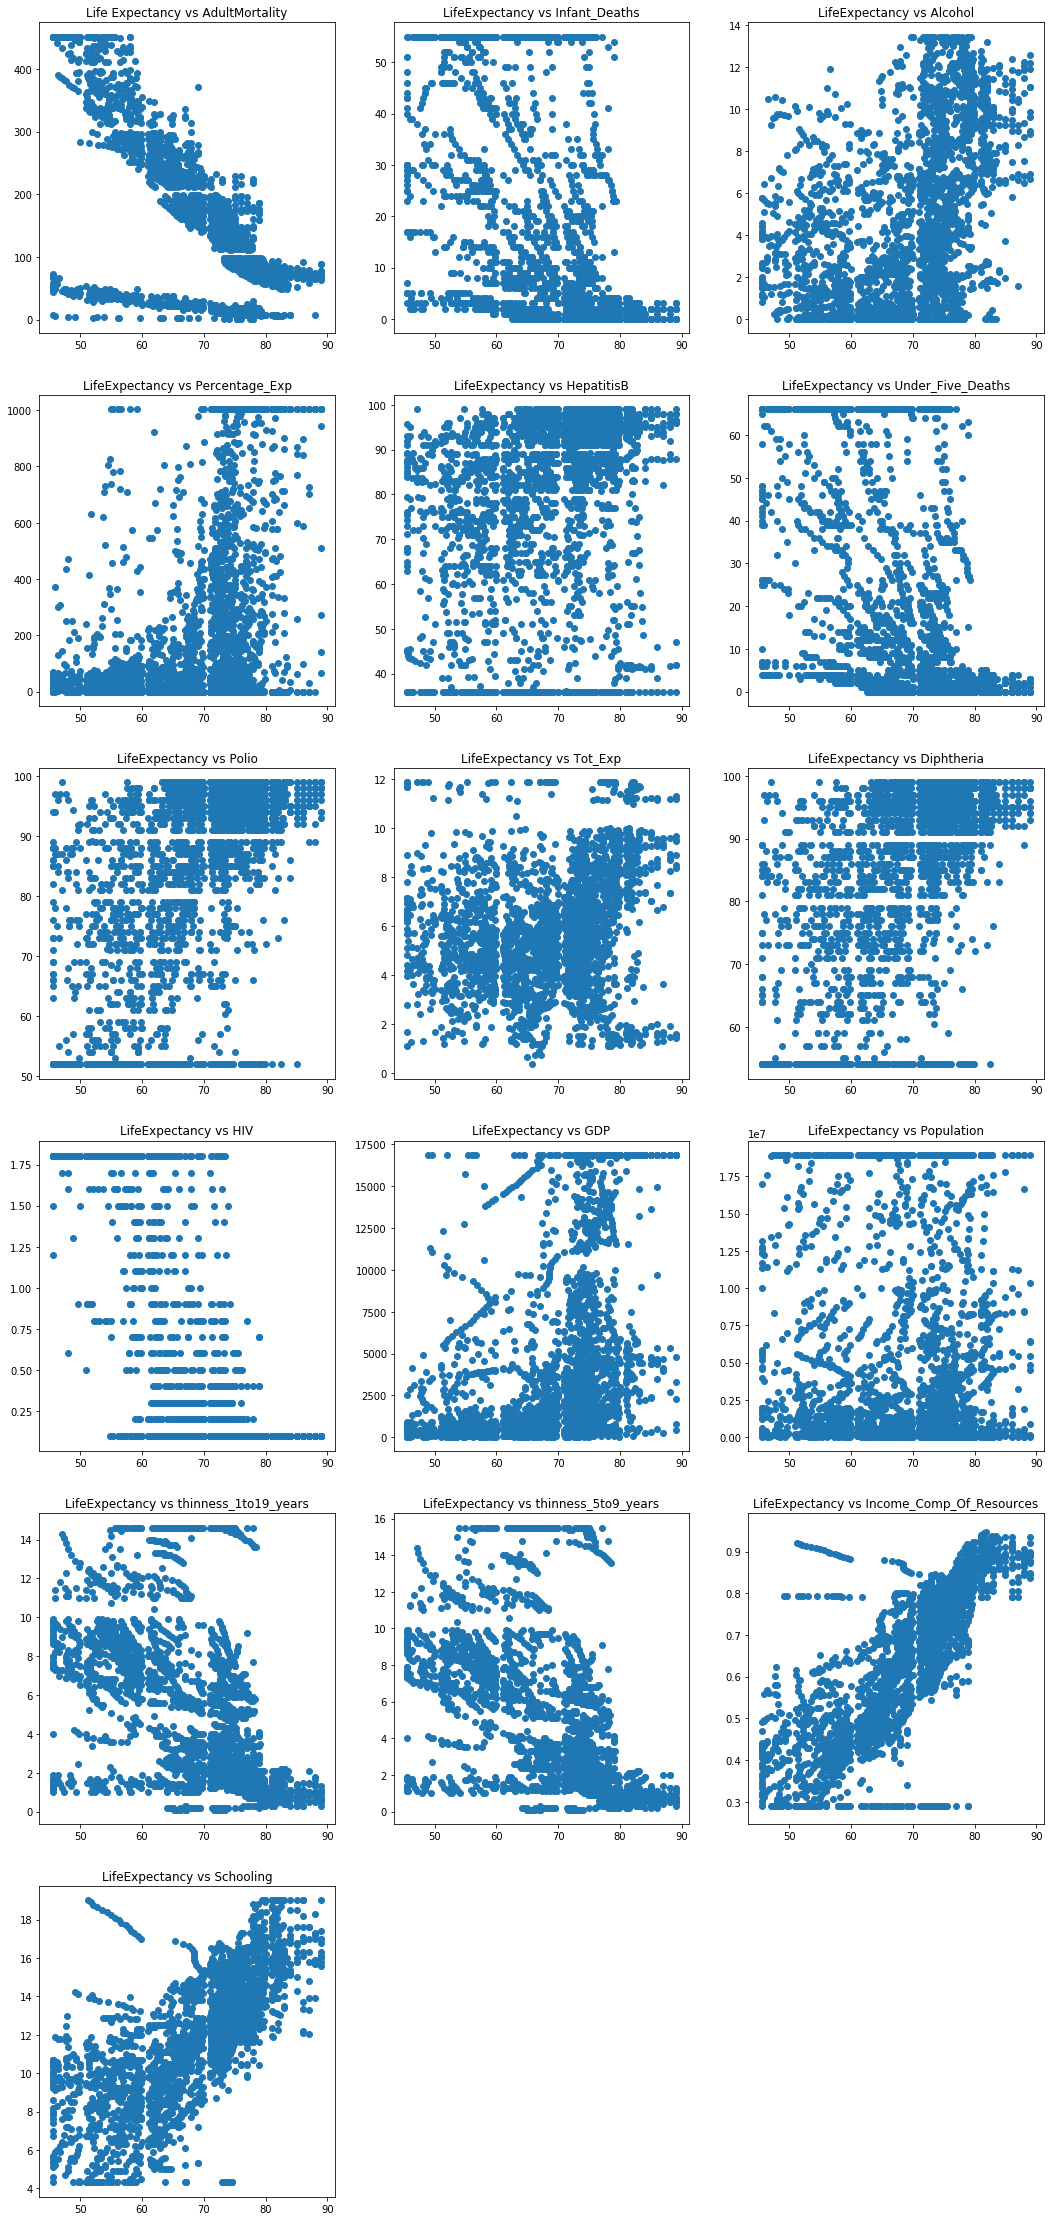

In [68]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df_le['winso_life_exp'], df_le["winso_adult_mort"])
plt.title("Life Expectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df_le['winso_life_exp'], df_le['winso_inf_dths'])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df_le['winso_life_exp'], df_le['winso_alc'])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df_le['winso_life_exp'], df_le['winso_prcnt_expend'])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df_le['winso_life_exp'], df_le['winso_hep_b'])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df_le['winso_life_exp'], df_le['winso_und_5_dths'])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df_le['winso_life_exp'], df_le['winso_polio'])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df_le['winso_life_exp'], df_le['winso_tot_exp'])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df_le['winso_life_exp'], df_le['winso_dip'])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df_le['winso_life_exp'], df_le['winso_hiv/aids'])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df_le['winso_life_exp'], df_le['winso_gdp'])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df_le['winso_life_exp'], df_le['winso_Pop'])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df_le['winso_life_exp'], df_le['winso_thin_1to19_yrs'])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df_le['winso_life_exp'], df_le['winso_thin_5to9_yrs'])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df_le['winso_life_exp'], df_le['winso_inc_comp_res'])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df_le['winso_life_exp'], df_le['winso_Schooling'])
plt.title("LifeExpectancy vs Schooling")


plt.show()

#### Observation:
* Life_Expectancy has somewhat Negative relationship with AdultMortality.
* Life_Expectancy has positive relationship with Income_Comp_Of_Resources and Schooling.

### Let us observe if there exists any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

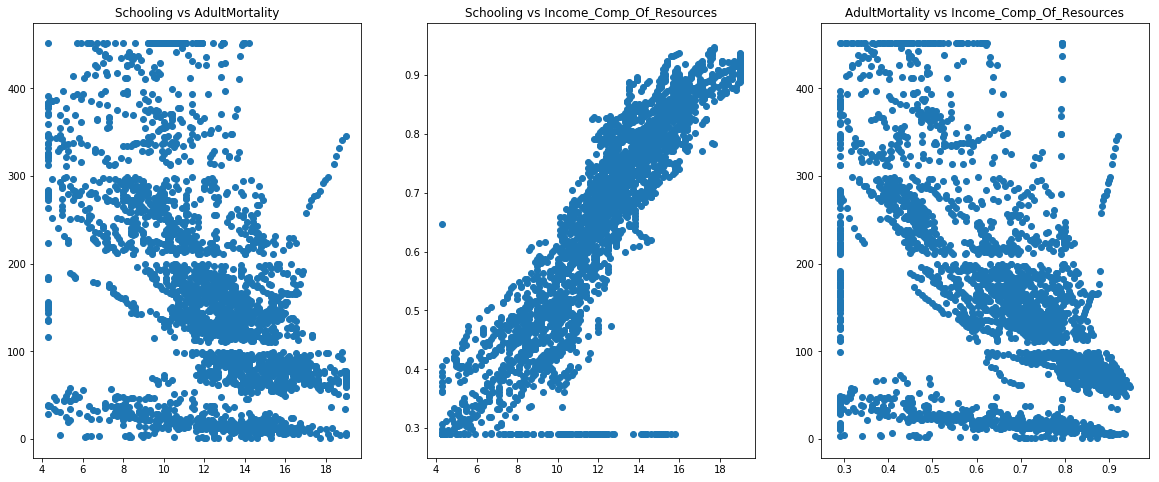

In [69]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(df_le['winso_Schooling'], df_le["winso_adult_mort"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(df_le['winso_Schooling'], df_le['winso_inc_comp_res'])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(df_le['winso_inc_comp_res'], df_le["winso_adult_mort"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

#### Looks like all these variables have inter-relation. Let us confirm this using correlation heatmap.
#### We see that there are positive & negative relationships between all the score types.





**<font color=red>A note on outliers</font>: Recall that in our checkpoint on outliers, we looked at extreme values for each variable separately. There is also another type of outlier, called a *two-dimensional outlier*, that represents unusual *combinations* of values. If you look at the scatterplots above carefully, you may notice some of those unusual value pairs. To deal with these, you can apply one of the techniques we explained in the outliers checkpoint.**

## Correlation coefficient

Another informative statistics that measures the comovements of two continuous variables is **correlation coefficient**. The correlation coefficient (*r*) is a numeric representation of the linear relationship between two continuous variables. Correlations range from -1 (a perfect negative relationship: as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (a perfect positive relationship: as values in one variable go up, values in the other go up as well).
 
Notice that what we observed in the scatterplots is actually a visual representation of the correlations between variables. Using a number that is indexed between -1 and 1 adds a layer of precision and ease of interpretation across items.

Pandas provides us the `.corr()` function to derive the correlation coefficients cross all continuous features in a data frame. Let's apply this function to both the YouTube and student performance datasets:

In [70]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [71]:
df_le.shape

(2936, 39)

In [72]:
# Correlation of winsorized variables
df_winso = df_le.iloc[:, 22:]
df_winso['cntry'] = df_le['cntry']
df_winso['yrs'] = df_le['yrs']
df_winso['status'] = df_le['status']
df_winso_num = df_winso.iloc[:, :-3]


In [73]:
df_winso_num.head() 

winso_life_exp  winso_adult_mort  winso_inf_dths  winso_alc  \
0            65.0             263.0              55       0.01   
1            59.9             271.0              55       0.01   
2            59.9             268.0              55       0.01   
3            59.5             272.0              55       0.01   
4            59.2             275.0              55       0.01   

   winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0           71.279624         65.0                66         52.0   
1           73.523582         62.0                66         58.0   
2           73.219243         64.0                66         62.0   
3           78.184215         67.0                66         67.0   
4            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [74]:
df_winso.head()

winso_life_exp  winso_adult_mort  winso_inf_dths  winso_alc  \
0            65.0             263.0              55       0.01   
1            59.9             271.0              55       0.01   
2            59.9             268.0              55       0.01   
3            59.5             272.0              55       0.01   
4            59.2             275.0              55       0.01   

   winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0           71.279624         65.0                66         52.0   
1           73.523582         62.0                66         58.0   
2           73.219243         64.0                66         62.0   
3           78.184215         67.0                66         67.0   
4            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling        cntry   yrs      status  
0             10.1  Afghanistan  2015  Developing  
1             10.0  Afghanistan  2014  Developing  
2              9.9  Afghanistan  2013  Developing  
3              9.8  Afghanistan  2012  Developing  
4              9.5  Afghanistan  2011  Developing

In [75]:
cormat = df_winso_num.corr()
cormat

winso_life_exp  winso_adult_mort  winso_inf_dths  \
winso_life_exp              1.000000         -0.690799       -0.566441   
winso_adult_mort           -0.690799          1.000000        0.383715   
winso_inf_dths             -0.566441          0.383715        1.000000   
winso_alc                   0.404064         -0.208050       -0.331379   
winso_prcnt_expend          0.489050         -0.321755       -0.348068   
winso_hep_b                 0.284666         -0.190852       -0.255030   
winso_und_5_dths           -0.605655          0.409471        0.992750   
winso_polio                 0.570364         -0.357556       -0.423089   
winso_tot_exp               0.217555         -0.129374       -0.157072   
winso_dip                   0.579977         -0.360795       -0.421013   
winso_hiv/aids             -0.796211          0.601682        0.415462   
winso_gdp                   0.487899         -0.321970       -0.331567   
winso_Pop                   0.006878         -0.000043        0.324667   
winso_thin_1to19_yrs       -0.526189          0.358016        0.442694   
winso_thin_5to9_yrs        -0.517792          0.362163        0.457981   
winso_inc_comp_res          0.785033         -0.518892       -0.459755   
winso_Schooling             0.726420         -0.460820       -0.487019   

                      winso_alc  winso_prcnt_expend  winso_hep_b  \
winso_life_exp         0.404064            0.489050     0.284666   
winso_adult_mort      -0.208050           -0.321755    -0.190852   
winso_inf_dths        -0.331379           -0.348068    -0.255030   
winso_alc              1.000000            0.384995     0.103117   
winso_prcnt_expend     0.384995            1.000000     0.084254   
winso_hep_b            0.103117            0.084254     1.000000   
winso_und_5_dths      -0.342421           -0.360003    -0.262829   
winso_polio            0.273973            0.269075     0.549387   
winso_tot_exp          0.299663            0.176926     0.104475   
winso_dip              0.280296            0.273376     0.598556   
winso_hiv/aids        -0.199602           -0.296896    -0.271119   
winso_gdp              0.427015            0.672426     0.112919   
winso_Pop              0.000133           -0.013990    -0.004106   
winso_thin_1to19_yrs  -0.443888           -0.336197    -0.146249   
winso_thin_5to9_yrs   -0.431842           -0.336421    -0.155947   
winso_inc_comp_res     0.504128            0.511908     0.257867   
winso_Schooling        0.524602            0.496099     0.247959   

                      winso_und_5_dths  winso_polio  winso_tot_exp  winso_dip  \
winso_life_exp               -0.605655     0.570364       0.217555   0.579977   
winso_adult_mort              0.409471    -0.357556      -0.129374  -0.360795   
winso_inf_dths                0.992750    -0.423089      -0.157072  -0.421013   
winso_alc                    -0.342421     0.273973       0.299663   0.280296   
winso_prcnt_expend           -0.360003     0.269075       0.176926   0.273376   
winso_hep_b                  -0.262829     0.549387       0.104475   0.598556   
winso_und_5_dths              1.000000    -0.443606      -0.157932  -0.440802   
winso_polio                  -0.443606     1.000000       0.162084   0.859996   
winso_tot_exp                -0.157932     0.162084       1.000000   0.170186   
winso_dip                    -0.440802     0.859996       0.170186   1.000000   
winso_hiv/aids                0.457183    -0.472289      -0.105345  -0.474794   
winso_gdp                    -0.345259     0.304187       0.145444   0.288340   
winso_Pop                     0.307663    -0.003274      -0.071472  -0.001703   
winso_thin_1to19_yrs          0.458270    -0.296455      -0.290645  -0.306256   
winso_thin_5to9_yrs           0.471076    -0.292713      -0.297765  -0.298314   
winso_inc_comp_res           -0.496942     0.517219       0.182450   0.513403   
winso_Schooling              -0.519511     0.503940       0.246177   0.501363   

     

In [76]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling', 'winso_life_exp',
       'winso_adult_mort', 'winso_inf_dths', 'winso_alc', 'winso_prcnt_expend',
       'winso_hep_b', 'winso_und_5_dths', 'winso_polio', 'winso_tot_exp',
       'winso_dip', 'winso_hiv/aids', 'winso_gdp', 'winso_Pop',
       'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs', 'winso_inc_comp_res',
       'winso_Schooling'],
      dtype='object')

Text(0.5, 1.0, 'CORRELATION MATRIX AMONG WINSORIZED VARIABLES')

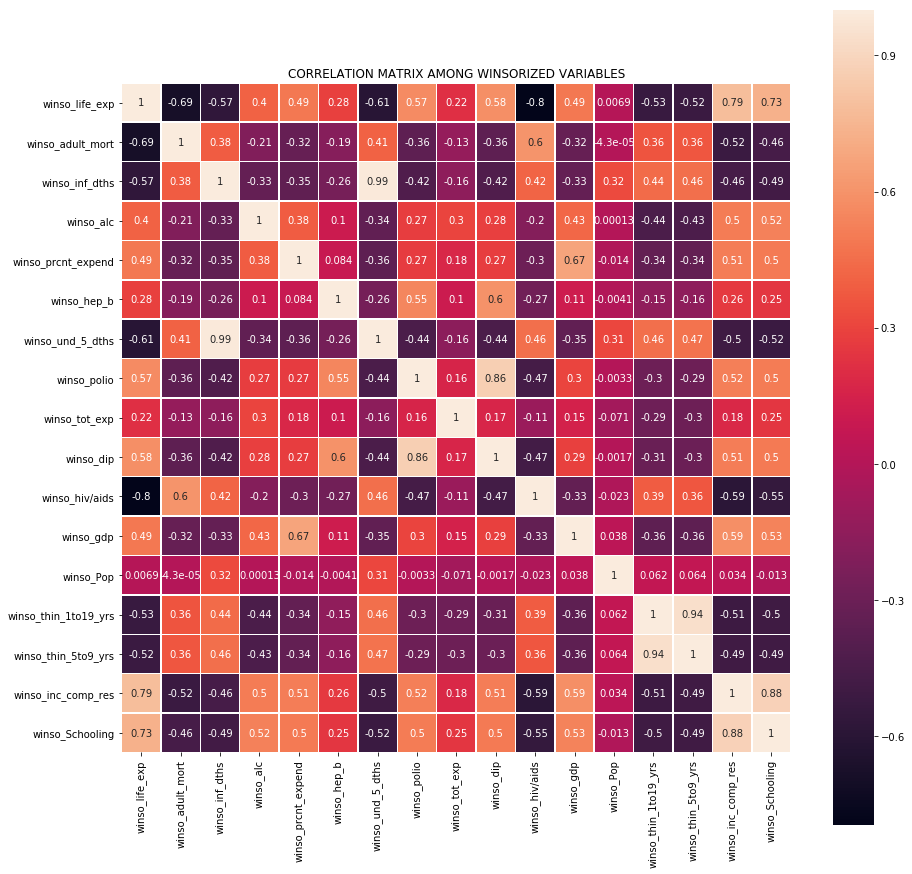

In [77]:
#Using heatmap to observe correlations
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square= True, annot= True, linewidths= 0.5)
plt.title('CORRELATION MATRIX AMONG WINSORIZED VARIABLES')

<b>Observations:</b><br/>
- winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling. <br/>
- winsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated. <br/>
- winsorized_Polio and winsorized_Diphtheria are correlated. <br/>
- winsorized_Percentage_Exp and winsorized_GDP are correlated. <br/>
- winsorized_Income_Comp_Of_Resources and <b>winsorized_Life_Expectancy</b> are correlated. <br/>
- <b>winsorized_Life_Expectancy</b> and winsorized_Schooling are correlated. <br/>
- winsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated. <br/>
- winsorized_HIV has negative relation with <b>winsorized_Life_Expectancy</b>. <br/>
- winsorized_Adult_Mortality has negative relation with <b>winsorized_Life_Expectancy</b>. <br/>


# Bivariate analysis of  a continuous-categorical pair

When we analyze a continuous and a categorical variable pair, we usually look at some metric of the continuous variable for each value of the categorical one. If we observe different values across categories, then this implies that the categorical variable has some important information regarding the continuous variable.

One way to look at this is to use the Pandas `.groupby()` function where we use the categorical variable as the grouping variable. After calling this function, we can call some aggregation function like `.mean()` or `.count()` to derive metrics for the continuous variable by group. Let's do this in the YouTube dataset using the *Grade* variable as the categorical variable:

In [78]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

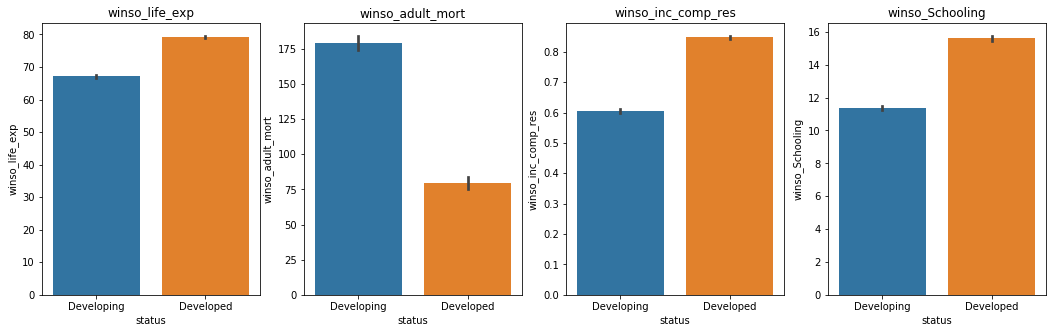

In [79]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
# draw the barplot using seaborn.
sns.barplot(df_le["status"], df_le["winso_life_exp"])
plt.title("winso_life_exp")

plt.subplot(1,4,2)
# draw the heatmap using seaborn.
sns.barplot(df_le["status"], df_le["winso_adult_mort"])
plt.title("winso_adult_mort")

plt.subplot(1,4,3)
# draw the heatmap using seaborn.
sns.barplot(df_le["status"], df_le["winso_inc_comp_res"])
plt.title("winso_inc_comp_res")

plt.subplot(1,4,4)
# draw the heatmap using seaborn.
sns.barplot(df_le["status"], df_le["winso_Schooling"])
plt.title("winso_Schooling")

plt.show()

In [80]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [81]:
df_le.groupby('status').mean()

yrs   life_exp  adult_mort   inf_dths       alc  \
status                                                                
Developed   2007.500000  79.197852   79.685547   1.494141  9.641367   
Developing  2007.518152  67.111465  182.833195  36.414191  3.479633   

            prcnt_expend      hep_b      measles        bmi  und_5_dths  \
status                                                                    
Developed    2703.600380  83.806185   499.005859  51.803906    1.810547   
Developing    323.737175  77.409131  2827.257013  35.439810   50.566832   

                polio  tot_expend        dip  hiv/aids           gdp  \
status                                                                 
Developed   93.736328    7.517470  93.476562  0.100000  20709.428649   
Developing  80.094678    5.608523  79.872525  2.090305   4635.671990   

                     pop  thin_1to19_yrs  thin_5to9_yrs  inc_comp_res  \
status                                                                  
Developed   7.297466e+06        1.320703       1.296680      0.847715   
Developing  1.333891e+07        5.636922       5.688243      0.589430   

            schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
status                                                                    
Developed   15.640031       79.197852         79.685547        1.494141   
Developing  11.322877       67.132092        179.312156       16.210809   

            winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  \
status                                                                     
Developed    9.624902          599.246259    84.898389          1.810547   
Developing   3.466861          202.175245    79.523243         20.728960   

            winso_polio  winso_tot_exp  winso_dip  winso_hiv/aids  \
status                                                              
Developed     94.324219       7.400165  94.355469        0.100000   
Developing    83.601220       5.594449  83.805222        0.617533   

               winso_gdp     winso_Pop  winso_thin_1to19_yrs  \
status                                                         
Developed   10628.336683  4.756362e+06              1.320703   
Developing   3721.832084  5.349008e+06              5.439815   

            winso_thin_5to9_yrs  winso_inc_comp_res  winso_Schooling  
status                                                                
Developed              1.296680            0.847715        15.598430  
Developing             5.505225            0.605113        11.380235

In [82]:
df_le.groupby('status').mean()[["winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"]]

winso_life_exp  winso_adult_mort  winso_inc_comp_res  \
status                                                             
Developed        79.197852         79.685547            0.847715   
Developing       67.132092        179.312156            0.605113   

            winso_Schooling  
status                       
Developed         15.598430  
Developing        11.380235

In [83]:
stats.ttest_ind(df_le[df_le.status=='Developed'][["winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"]],
        df_le[df_le.status=='Developing'][["winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"]])
                                           

Ttest_indResult(statistic=array([ 29.94090423, -18.82159988,  33.14186181,  31.49706727]), pvalue=array([4.15230876e-172, 1.06377861e-074, 7.16207123e-205, 7.84792134e-188]))

In [84]:
#Which correlated the most with each other
df_le[["winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"]].corr()

winso_life_exp  winso_adult_mort  winso_inc_comp_res  \
winso_life_exp            1.000000         -0.690799            0.785033   
winso_adult_mort         -0.690799          1.000000           -0.518892   
winso_inc_comp_res        0.785033         -0.518892            1.000000   
winso_Schooling           0.726420         -0.460820            0.876847   

                    winso_Schooling  
winso_life_exp             0.726420  
winso_adult_mort          -0.460820  
winso_inc_comp_res         0.876847  
winso_Schooling            1.000000

In [85]:
grouped_df = df_le.groupby("status")
grouped_df

In [87]:
df_le.groupby('status').mean()

yrs   life_exp  adult_mort   inf_dths       alc  \
status                                                                
Developed   2007.500000  79.197852   79.685547   1.494141  9.641367   
Developing  2007.518152  67.111465  182.833195  36.414191  3.479633   

            prcnt_expend      hep_b      measles        bmi  und_5_dths  \
status                                                                    
Developed    2703.600380  83.806185   499.005859  51.803906    1.810547   
Developing    323.737175  77.409131  2827.257013  35.439810   50.566832   

                polio  tot_expend        dip  hiv/aids           gdp  \
status                                                                 
Developed   93.736328    7.517470  93.476562  0.100000  20709.428649   
Developing  80.094678    5.608523  79.872525  2.090305   4635.671990   

                     pop  thin_1to19_yrs  thin_5to9_yrs  inc_comp_res  \
status                                                                  
Developed   7.297466e+06        1.320703       1.296680      0.847715   
Developing  1.333891e+07        5.636922       5.688243      0.589430   

            schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
status                                                                    
Developed   15.640031       79.197852         79.685547        1.494141   
Developing  11.322877       67.132092        179.312156       16.210809   

            winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  \
status                                                                     
Developed    9.624902          599.246259    84.898389          1.810547   
Developing   3.466861          202.175245    79.523243         20.728960   

            winso_polio  winso_tot_exp  winso_dip  winso_hiv/aids  \
status                                                              
Developed     94.324219       7.400165  94.355469        0.100000   
Developing    83.601220       5.594449  83.805222        0.617533   

               winso_gdp     winso_Pop  winso_thin_1to19_yrs  \
status                                                         
Developed   10628.336683  4.756362e+06              1.320703   
Developing   3721.832084  5.349008e+06              5.439815   

            winso_thin_5to9_yrs  winso_inc_comp_res  winso_Schooling  
status                                                                
Developed              1.296680            0.847715        15.598430  
Developing             5.505225            0.605113        11.380235

In [88]:
# Test whether group differences are significant.
status_uni = df_le.status.unique()
grouped_df = df_le.groupby("status")
for var in ["winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(status_uni)):
        for j in range(i+1, len(status_uni)):
            print("t-test between groups {0} and {1}:".format(status_uni[i], status_uni[j]))
            print(stats.ttest_ind(
                df_le[df_le["status"]==status_uni[i]][var], 
                df_le[df_le["status"]==status_uni[j]][var]
            ))

------------------------------------------------
Comparisons for variable: winso_life_exp
------------------------------------------------
t-test between groups Developing and Developed:
Ttest_indResult(statistic=-29.94090422764744, pvalue=4.152308757677825e-172)
------------------------------------------------
Comparisons for variable: winso_adult_mort
------------------------------------------------
t-test between groups Developing and Developed:
Ttest_indResult(statistic=18.821599878478658, pvalue=1.0637786138611255e-74)
------------------------------------------------
Comparisons for variable: winso_inc_comp_res
------------------------------------------------
t-test between groups Developing and Developed:
Ttest_indResult(statistic=-33.14186180616746, pvalue=7.162071230765678e-205)
------------------------------------------------
Comparisons for variable: winso_Schooling
------------------------------------------------
t-test between groups Developing and Developed:
Ttest_indResul

# Bivariate analysis of  two categorical variables

The last combination remaining is the pair of two categorical variables. Since categorical variables take a limited number of different values by definition, the most common technique used is the observation count of all value pairs. The Pandas `.crosstab()` function does this for us. Let's use it on the students performance dataset:

In [89]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [90]:
# create crosstab of categories: 
count_table = pd.crosstab(df_le['status'], df_le['cntry'])
count_table

cntry       Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
status                                                                   
Developed             0        0        0       0                    0   
Developing           16       16       16      16                   16   

cntry       Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  \
status                                                                    
Developed           0        0         16       16           0        0   
Developing         16       16          0        0          16       16   

cntry       Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  \
status                                                                       
Developed         0           0         0        0       16       0      0   
Developing       16          16        16       16        0      16     16   

cntry       Bhutan  Bolivia (Plurinational State of)  Bosnia and Herzegovina  \
status                                                                         
Developed        0                                 0                       0   
Developing      16                                16                      16   

cntry       Botswana  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  \
status                                                                    
Developed          0       0                  0        16             0   
Developing        16      16                 16         0            16   

cntry       Burundi  Cabo Verde  Cambodia  Cameroon  Canada  \
status                                                        
Developed         0           0         0         0       0   
Developing       16          16        16        16      16   

cntry       Central African Republic  Chad  Chile  China  Colombia  Comoros  \
status                                                                        
Developed                          0     0      0      0         0        0   
Developing                        16    16     16     16        16       16   

cntry       Congo  Cook Islands  Costa Rica  Croatia  Cuba  Cyprus  Czechia  \
status                                                                        
Developed       0             0           0       16     0      16       16   
Developing     16             1          16        0    16       0        0   

cntry       Côte d'Ivoire  Democratic People's Republic of Korea  \
status                                                             
Developed               0                                      0   
Developing             16                                     16   

cntry       Democratic Republic of the Congo  Denmark  Djibouti  Dominica  \
status                                                                      
Developed                                  0       16         0         0   
Developing                                16        0        16         1   

cntry       Dominican Republic  Ecuador  Egypt  El Salvador  \
status                                                        
Developed                    0        0      0            0   
Developing                  16       16     16           16   

cntry       Equatorial Guinea  Eritrea  Estonia  Ethiopia  Fiji  Finland  \
status                                                                     
Developed                   0        0        0         0     0        0   
Developing                 16       16       16        16    16       16   

cntry       France  Gabon  Gambia  Georgia  Germany  Ghana  Greece  Grenada  \
status                                                                        
Developed        0      0       0        0       16      0       0        0   
Developing      16     16      16       16        0     16      16       16   

cntry       Guatemala  Guinea  Guinea-Bissau  Guyana  Haiti  Honduras  \
status                                            

In [91]:
# create crosstab of categories: 
count_table = pd.crosstab(df_le['status'], df_le['yrs'])
count_table

yrs         2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
status                                                                         
Developed     32    32    32    32    32    32    32    32    32    32    32   
Developing   151   151   151   151   151   151   151   151   151   151   151   

yrs         2011  2012  2013  2014  2015  
status                                    
Developed     32    32    32    32    32  
Developing   151   151   159   151   151

In [92]:
# create crosstab of categories: 
count_table = pd.crosstab(df_le['cntry'], df_le['yrs'])
count_table

yrs                                                 2000  2001  2002  2003  \
cntry                                                                        
Afghanistan                                            1     1     1     1   
Albania                                                1     1     1     1   
Algeria                                                1     1     1     1   
Angola                                                 1     1     1     1   
Antigua and Barbuda                                    1     1     1     1   
Argentina                                              1     1     1     1   
Armenia                                                1     1     1     1   
Australia                                              1     1     1     1   
Austria                                                1     1     1     1   
Azerbaijan                                             1     1     1     1   
Bahamas                                                1     1     1     1   
Bahrain                                                1     1     1     1   
Bangladesh                                             1     1     1     1   
Barbados                                               1     1     1     1   
Belarus                                                1     1     1     1   
Belgium                                                1     1     1     1   
Belize                                                 1     1     1     1   
Benin                                                  1     1     1     1   
Bhutan                                                 1     1     1     1   
Bolivia (Plurinational State of)                       1     1     1     1   
Bosnia and Herzegovina                                 1     1     1     1   
Botswana                                               1     1     1     1   
Brazil                                                 1     1     1     1   
Brunei Darussalam                                      1     1     1     1   
Bulgaria                                               1     1     1     1   
Burkina Faso                                           1     1     1     1   
Burundi                                                1     1     1     1   
Cabo Verde                                             1     1     1     1   
Cambodia                                               1     1     1     1   
Cameroon                                               1     1     1     1   
Canada                                                 1     1     1     1   
Central African Republic                               1     1     1     1   
Chad                                                   1     1     1     1   
Chile                                                  1     1     1     1   
China                                                  1     1     1     1   
Colombia                                               1     1     1     1   
Comoros                                                1     1     1     1   
Congo                                                  1     1     1     1   
Cook Islands                                           0     0     0     0   
Costa Rica                                             1     1     1     1   
Croatia                                                1     1     1     1   
Cuba                                                   1     1     1     1   
Cyprus                                                 1     1     1     1   
Czechia                                                1     1     1     1   
Côte d'Ivoire                                          1     1     1     1   
Democratic People's Republic of Korea                  1     1     1     1   
Democratic Republic of the Congo                       1     1     1     1   
Denmark                                                1     1     1     1   
Djibouti                                               1     1     1     1   
Dominica              

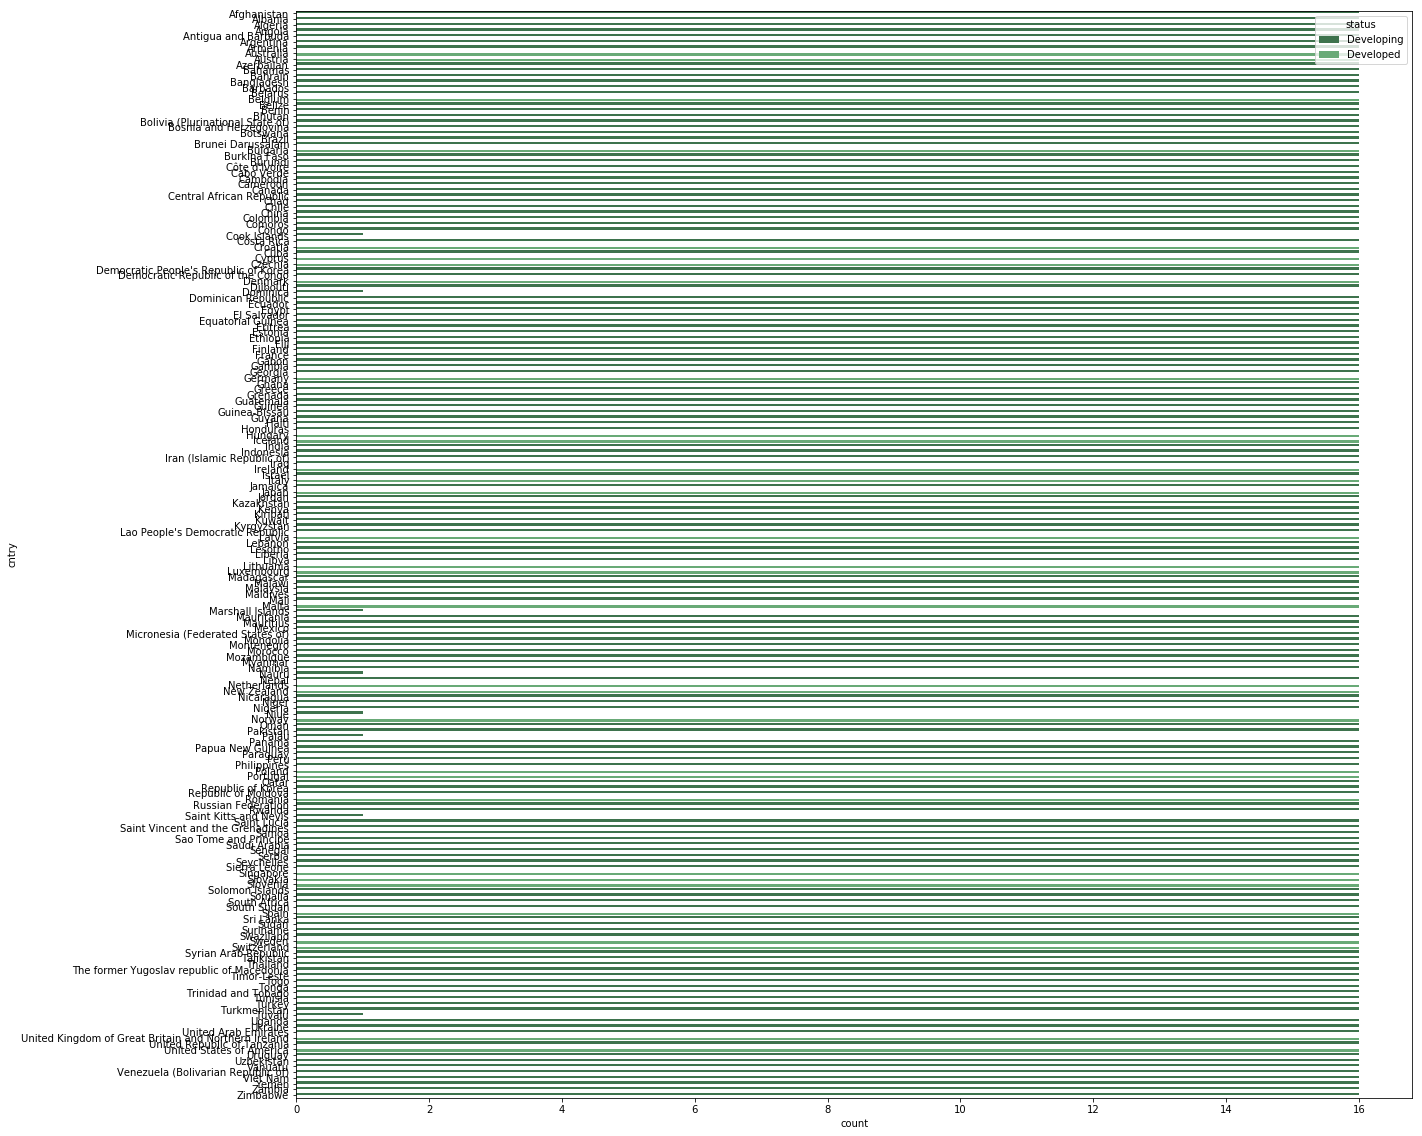

In [93]:
# Plot counts for each combination of levels.
plt.figure(figsize=[20,20])
sns.countplot(y="cntry", hue="status", data=df_le, palette="Greens_d")
plt.show()

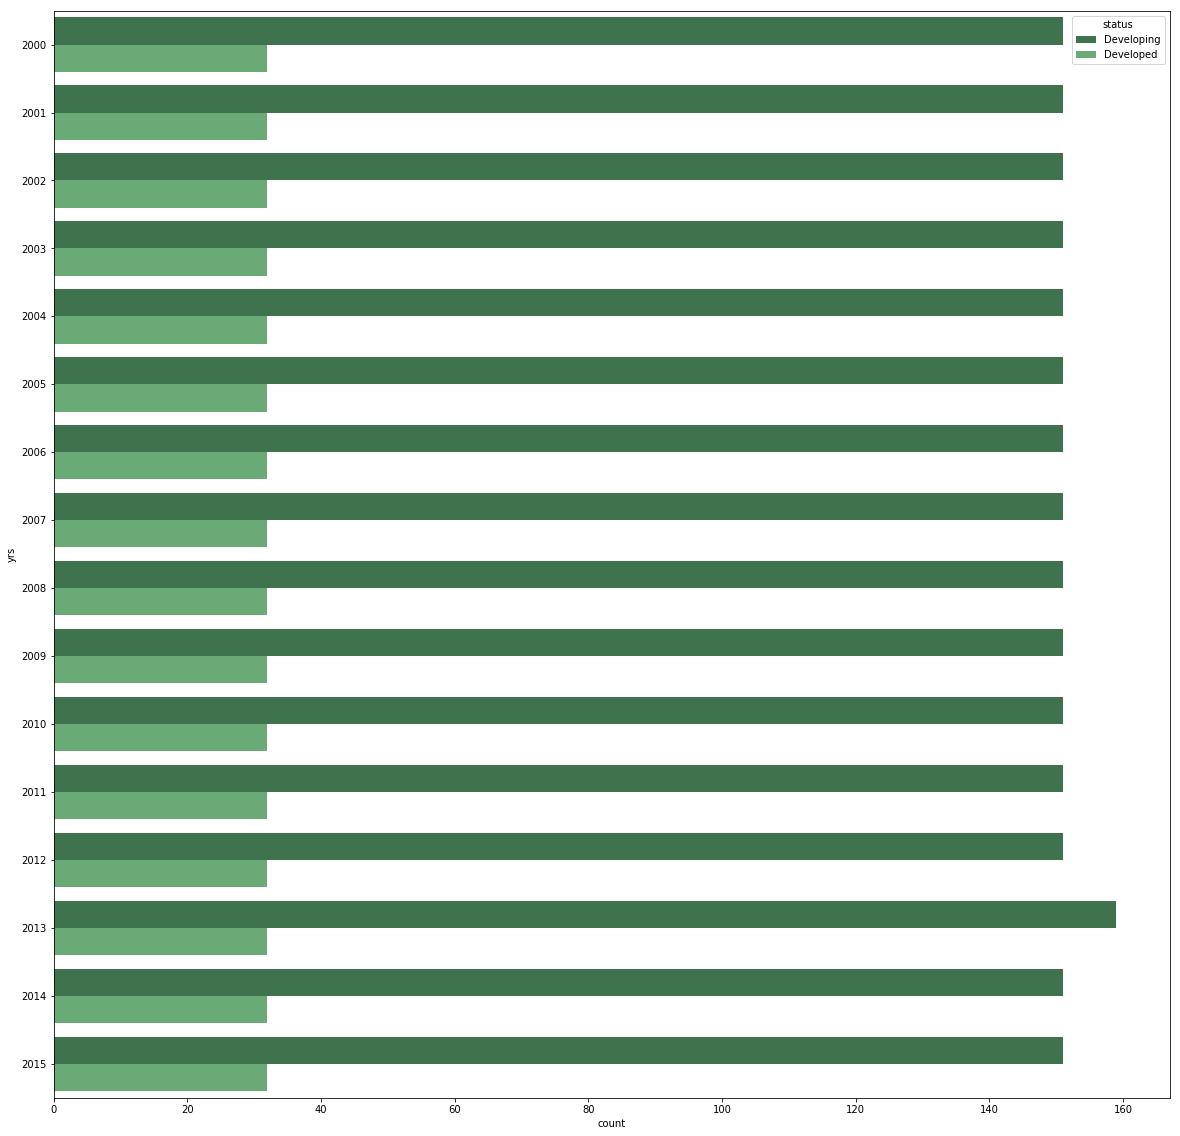

In [94]:
# Plot counts for each combination of levels.
plt.figure(figsize=[20,20])
sns.countplot(y="yrs", hue="status", data=df_le, palette="Greens_d")
plt.show()

In [95]:
round(df_le[['status','life_exp']].groupby(['status']).mean(),2)

life_exp
status              
Developed      79.20
Developing     67.11

In [96]:
df_le[['status', 'life_exp']].groupby(['status']).mean()

life_exp
status               
Developed   79.197852
Developing  67.111465

### From the above, developed countries have higher average Life_Expectancy compared to Developing.
### Let us find out statistically if this difference is significant. ### 

In [97]:
# Finding the significance of difference of the average life ecpectancy 
# between developed and developing countries using T-test
stats.ttest_ind(df_le.loc[df_le['status']=='Developed', 'life_exp'], df_le.loc[df_le['status']=='Developing', 'life_exp'])

Ttest_indResult(statistic=29.817637466975782, pvalue=7.015306498110242e-171)

In [98]:
df_le.loc[df_le['status']=='Developed', 'life_exp']

112     82.8
113     82.7
114     82.5
115     82.3
116     82.0
117     81.9
118     81.7
119     81.3
120     81.3
121     81.2
122     81.0
123     86.0
124     83.0
125     79.9
126     79.9
127     79.5
128     81.5
129     81.4
130     81.1
131     88.0
132     88.0
133     84.0
134     82.0
135     84.0
136     81.0
137     79.8
138     79.4
139     79.3
140     78.8
141     78.7
142     78.6
143     78.1
240     81.1
241     89.0
242     87.0
243     83.0
244     83.0
245     80.0
246     79.8
247     79.5
248     79.5
249     79.4
250     78.9
251     78.8
252     78.3
253     78.0
254     78.0
255     77.6
384     74.5
385     74.3
386     74.1
387     73.9
388     73.7
389     73.4
390     73.2
391     72.9
392     72.6
393     72.2
394     72.1
395     72.2
396     72.0
397     71.8
398     71.6
399     71.1
641     78.0
642     77.8
643     77.7
644     77.1
645     77.0
646     76.6
647     76.3
648     76.0
649     75.8
650     75.9
651     75.2
652     75.4
653     74.7

In [99]:
df_le.loc[df_le['status']=='Developing', 'life_exp']

0       65.000000
1       59.900000
2       59.900000
3       59.500000
4       59.200000
5       58.800000
6       58.600000
7       58.100000
8       57.500000
9       57.300000
10      57.300000
11      57.000000
12      56.700000
13      56.200000
14      55.300000
15      54.800000
16      77.800000
17      77.500000
18      77.200000
19      76.900000
20      76.600000
21      76.200000
22      76.100000
23      75.300000
24      75.900000
25      74.200000
26      73.500000
27      73.000000
28      72.800000
29      73.300000
30      73.600000
31      72.600000
32      75.600000
33      75.400000
34      75.300000
35      75.100000
36      74.900000
37      74.700000
38      74.400000
39      74.100000
40      73.800000
41      73.400000
42      72.900000
43      72.300000
44      71.700000
45      71.600000
46      71.400000
47      71.300000
48      52.400000
49      51.700000
50      51.100000
51      56.000000
52      51.000000
53      49.600000
54      49.100000
55      48

![](http://)<b>p value is < 0.05<br/>
Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

# <b>Feature engineering:

In the feature engineering step, you need to select a suit of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

# Creating new variables

Sometimes, we may want to define new features that we believe will be useful in explaining our target variable. If this statement sounds general, it is: the only limit here is your own creativity. Let's start with an example:

Say that we have a variable called *name* in our dataset. This variable has values like `Mr. Adam Smith`, `Sir Anthony Hopkins`, `Queen Elizabeth`, `Papa James Hetfield`, etc. This is text data and as such it's hard to use in a model. However, with the help of our imagination we can derive a useful feature from it. By deriving titles like "Mr", "Sir", "Queen", or "Papa" from the names, we can determine the gender of the person and create a new feature called *gender*. You can also try to imagine what you can do with a variable that holds the full addresses of the people.

Since this topic is very broad, we just mention here a few common use cases that you may find useful when working with continuous variables:

1. **Combining two or more highly-correlated variables**: Many models assume that features are correlated with the outcome, but uncorrelated with each other. Two highly-correlated variables can be averaged to create a feature, or one can be dropped. Three or more highly-correlated variables can also be combined using a statistical method called **Principal Components Analysis** ("PCA") that reduces the correlated set of variables into a smaller set of uncorrelated features. We’ll do an in-depth introduction to PCA in the next checkpoint.

2. **Interactions of variables**: If you suspect that the relationship between the outcome and a feature depends on the value of a second feature, you may want to create a feature that represents the interaction between the two. For example, perhaps watching more TV only makes people sad if they do it alone.  People who live with a partner are probably less likely to watch TV alone.  To represent the concept that people who live with a romantic partner don't get sad watching TV but people who don't live with a romantic partner do get sad, we can multiply our 'partner' indicator by the 'sadness' feature to create the interaction.

3. **Creating linear relationships**: Many models assume that the relationship between a feature and an outcome is linear.  Sometimes, though, you want to include a variable that has a non-linear component to its relationship with the outcome. To capture non-linearity while satisfying the model's assumptions, it can be helpful to create quadratic or higher-level features by squaring, cubing, or otherwise multiplying a variable by itself. 

Let us create a new data frame with feature columns correlated to Life_Expectancy. As per the correlation heatmap, it<br/> is clear that the following fields are correlated with winsorized_Life_Expectancy.<br/>

- winsorized_Schooling<br/>
- winsorized_Income_Comp_Of_Resources<br/>
- winsorized_HIV<br/>
- winsorized_Adult_Mortality<br/>

Also it is to be noticed that winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling.<br/>
All the features should NOT be inter related and hence let us eliminate one of these based on the correlation<br/> value w.r.t winsorized_Life_Expectancy.<br/>

- winsorized_Income_Comp_Of_Resources corr with winsorized_Life_Expectancy = 0.82<br/>
- winsorized_Schooling corr with winsorized_Life_Expectancy = 0.76<br/>

Let us eliminate winsorized_Schooling as it has relatively low correlation factor. Also, we can choose 'Status' as an important feature based on the above analysis.

In [100]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling', 'winso_life_exp',
       'winso_adult_mort', 'winso_inf_dths', 'winso_alc', 'winso_prcnt_expend',
       'winso_hep_b', 'winso_und_5_dths', 'winso_polio', 'winso_tot_exp',
       'winso_dip', 'winso_hiv/aids', 'winso_gdp', 'winso_Pop',
       'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs', 'winso_inc_comp_res',
       'winso_Schooling'],
      dtype='object')

In [101]:
#Create a data frame w/ features
df_feature = df_le[['status', 'winso_life_exp', 'winso_adult_mort','winso_inc_comp_res']]

In [102]:
df_feature.head()

status  winso_life_exp  winso_adult_mort  winso_inc_comp_res
0  Developing            65.0             263.0               0.479
1  Developing            59.9             271.0               0.476
2  Developing            59.9             268.0               0.470
3  Developing            59.5             272.0               0.463
4  Developing            59.2             275.0               0.454

In [103]:
#Convert categorical values to numerical values using one-hot encoding for "status" features
df_feature = pd.concat([df_feature, pd.get_dummies(df_feature['status'], drop_first=True)], axis=1)
df_feature.head()

status  winso_life_exp  winso_adult_mort  winso_inc_comp_res  \
0  Developing            65.0             263.0               0.479   
1  Developing            59.9             271.0               0.476   
2  Developing            59.9             268.0               0.470   
3  Developing            59.5             272.0               0.463   
4  Developing            59.2             275.0               0.454   

   Developing  
0           1  
1           1  
2           1  
3           1  
4           1

In [104]:
df_feature_fin = df_feature.drop('status', axis=1)
df_feature_fin

winso_life_exp  winso_adult_mort  winso_inc_comp_res  Developing
0          65.000000        263.000000            0.479000           1
1          59.900000        271.000000            0.476000           1
2          59.900000        268.000000            0.470000           1
3          59.500000        272.000000            0.463000           1
4          59.200000        275.000000            0.454000           1
5          58.800000        279.000000            0.448000           1
6          58.600000        281.000000            0.434000           1
7          58.100000        287.000000            0.433000           1
8          57.500000        295.000000            0.415000           1
9          57.300000        295.000000            0.405000           1
10         57.300000        291.000000            0.396000           1
11         57.000000        293.000000            0.381000           1
12         56.700000        295.000000            0.373000           1
13         56.200000          3.000000            0.341000           1
14         55.300000        316.000000            0.340000           1
15         54.800000        321.000000            0.338000           1
16         77.800000         74.000000            0.762000           1
17         77.500000          8.000000            0.761000           1
18         77.200000         84.000000            0.759000           1
19         76.900000         86.000000            0.752000           1
20         76.600000         88.000000            0.738000           1
21         76.200000         91.000000            0.725000           1
22         76.100000         91.000000            0.721000           1
23         75.300000          1.000000            0.713000           1
24         75.900000          9.000000            0.703000           1
25         74.200000         99.000000            0.696000           1
26         73.500000         15.000000            0.685000           1
27         73.000000         17.000000            0.681000           1
28         72.800000         18.000000            0.674000           1
29         73.300000         15.000000            0.670000           1
30         73.600000         14.000000            0.662000           1
31         72.600000         11.000000            0.656000           1
32         75.600000         19.000000            0.743000           1
33         75.400000         11.000000            0.741000           1
34         75.300000        112.000000            0.737000           1
35         75.100000        113.000000            0.732000           1
36         74.900000        116.000000            0.724000           1
37         74.700000        119.000000            0.714000           1
38         74.400000        123.000000            0.705000           1
39         74.100000        126.000000            0.697000           1
40         73.800000        129.000000            0.690000           1
41         73.400000        132.000000            0.686000           1
42         72.900000        136.000000            0.680000           1
43         72.300000         14.000000            0.673000           1
44         71.700000        146.000000            0.663000           1
45         71.600000        145.000000            0.653000           1
46         71.400000        145.000000            0.644000           1
47         71.300000        145.000000            0.636000           1
48         52.400000        335.000000            0.531000           1
49         51.700000        348.000000            0.527000           1
50         51.100000        355.000000            0.523000           1
51         56.000000        358.000000            0.508000           1
52         51.000000        361.000000            0.495000           1
53         49.600000        365.000000            0.488000           1
54         49.100000        369.000000            0.480000           1
55         48.700000        37

Many machine learning models assume the target variable to be normally distributed. If normality is an assumption non-normal variables can be transformed into normally distributed features using transformations such as taking the square root, the inverse, or the log of the variable, or by applying the Box-Cox transformation.

Also, many machine learning models assume that all features have values in the same range (all features have a min of 0 and max of 1, for example) or they exhibit normal statistical properties. For some techniques, features that vary in range can result in incorrect estimates and results. To be able to apply these techniques and methods, we need to rescale our variables to fit a limited range, or standardize our variables to exhibit some regular statistical patterns. In this case, we can use two concepts of rescaling: <b>normalization</b> and <b>standardization</b>.

# 1. Are the ["winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"] variables distributed normally? 
# If not, apply Box-Cox transformation. Does anything change?

In [106]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [107]:
df_le[df_le["winso_inc_comp_res"]>0][["winso_inc_comp_res"]]

winso_inc_comp_res
0               0.479000
1               0.476000
2               0.470000
3               0.463000
4               0.454000
5               0.448000
6               0.434000
7               0.433000
8               0.415000
9               0.405000
10              0.396000
11              0.381000
12              0.373000
13              0.341000
14              0.340000
15              0.338000
16              0.762000
17              0.761000
18              0.759000
19              0.752000
20              0.738000
21              0.725000
22              0.721000
23              0.713000
24              0.703000
25              0.696000
26              0.685000
27              0.681000
28              0.674000
29              0.670000
30              0.662000
31              0.656000
32              0.743000
33              0.741000
34              0.737000
35              0.732000
36              0.724000
37              0.714000
38              0.705000
39              0.697000
40              0.690000
41              0.686000
42              0.680000
43              0.673000
44              0.663000
45              0.653000
46              0.644000
47              0.636000
48              0.531000
49              0.527000
50              0.523000
51              0.508000
52              0.495000
53              0.488000
54              0.480000
55              0.468000
56              0.454000
57              0.439000
58              0.426000
59              0.415000
60              0.406000
61              0.401000
62              0.391000
63              0.382000
64              0.784000
65              0.782000
66              0.781000
67              0.778000
68              0.782000
69              0.783000
70              0.788000
71              0.786000
72              0.781000
73              0.773000
74              0.290000
75              0.290000
76              0.290000
77              0.290000
78              0.290000
79              0.290000
80              0.826000
81              0.825000
82              0.823000
83              0.822000
84              0.816000
85              0.802000
86              0.794000
87              0.792000
88              0.788000
89              0.782000
90              0.780000
91              0.775000
92              0.770000
93              0.776000
94              0.771000
95              0.764000
96              0.741000
97              0.739000
98              0.736000
99              0.732000
100             0.729000
101             0.720000
102             0.725000
103             0.721000
104             0.707000
105             0.692000
106             0.679000
107             0.668000
108             0.657000
109             0.645000
110             0.644000
111             0.639000
112             0.937000
113             0.936000
114             0.933000
115             0.930000
116             0.927000
117             0.927000
118             0.925000
119             0.921000
120             0.918000
121             0.915000
122             0.910000
123             0.908000
124             0.905000
125             0.902000
126             0.899000
127             0.897000
128             0.892000
129             0.892000
130             0.887000
131             0.884000
132             0.880000
133             0.872000
134             0.870000
135             0.864000
136             0.860000
137             0.854000
138             0.848000
139             0.841000
140             0.837000
141             0.847000
142             0.837000
143             0.833000
144             0.758000
145             0.752000
146             0.745000
147             0.742000
148             0.741000
149             0.737000
150             0.728000
151             0.719000
152             0.708000
153             0.682000
154             0.675000
155             0.668000
156             0.659000
157             0.651000
158             0.642000
159   

In [108]:
df_le.columns

Index(['cntry', 'yrs', 'status', 'life_exp', 'adult_mort', 'inf_dths', 'alc',
       'prcnt_expend', 'hep_b', 'measles', 'bmi', 'und_5_dths', 'polio',
       'tot_expend', 'dip', 'hiv/aids', 'gdp', 'pop', 'thin_1to19_yrs',
       'thin_5to9_yrs', 'inc_comp_res', 'schooling', 'winso_life_exp',
       'winso_adult_mort', 'winso_inf_dths', 'winso_alc', 'winso_prcnt_expend',
       'winso_hep_b', 'winso_und_5_dths', 'winso_polio', 'winso_tot_exp',
       'winso_dip', 'winso_hiv/aids', 'winso_gdp', 'winso_Pop',
       'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs', 'winso_inc_comp_res',
       'winso_Schooling'],
      dtype='object')

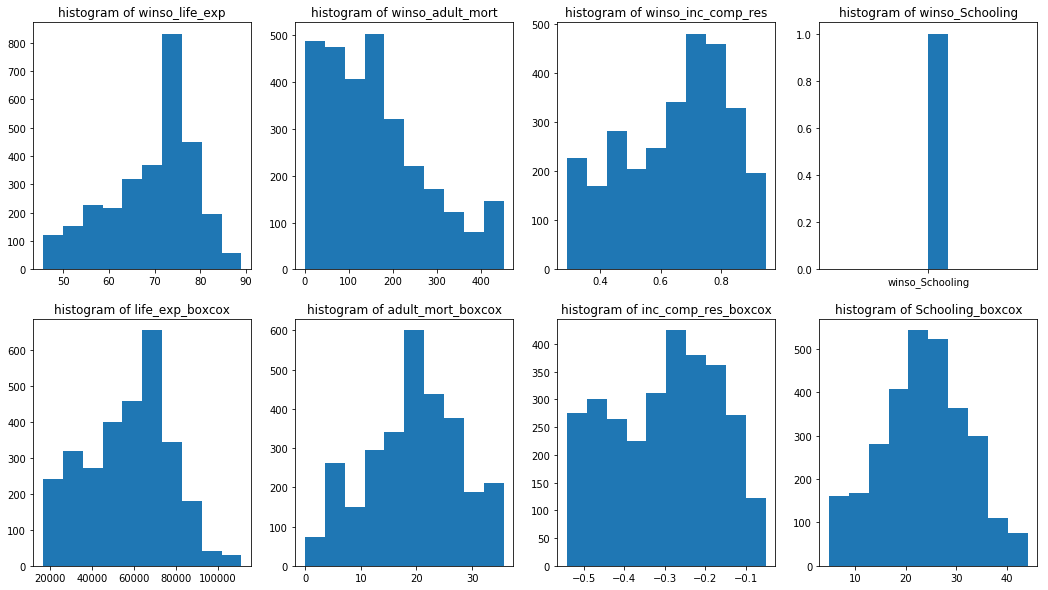

In [109]:
from scipy.stats import boxcox

#"winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"
# there is an observation with math score is equal to 0
# since box-cox transformation only works with positive data
# we are excluding it.
life_exp_boxcox,_ = boxcox(df_le["winso_life_exp"])
adult_mort_boxcox,_ = boxcox(df_le["winso_adult_mort"])
inc_comp_res_boxcox,_ = boxcox(df_le[df_le["winso_inc_comp_res"]>0][["winso_inc_comp_res"]])
Schooling_boxcox,_ = boxcox(df_le["winso_Schooling"])




plt.figure(figsize=(18,10))

plt.subplot(2, 4, 1)
plt.hist(df_le["winso_life_exp"])
plt.title("histogram of winso_life_exp")

plt.subplot(2, 4, 2)
plt.hist(df_le["winso_adult_mort"])
plt.title("histogram of winso_adult_mort")

plt.subplot(2, 4, 3)
plt.hist(df_le["winso_inc_comp_res"])
plt.title("histogram of winso_inc_comp_res")

plt.subplot(2, 4, 4)
plt.hist("winso_Schooling")
plt.title("histogram of winso_Schooling")

plt.subplot(2, 4, 5)
plt.hist(life_exp_boxcox)
plt.title("histogram of life_exp_boxcox")

plt.subplot(2, 4, 6)
plt.hist(adult_mort_boxcox)
plt.title("histogram of adult_mort_boxcox")

plt.subplot(2, 4, 7)
plt.hist(inc_comp_res_boxcox)
plt.title("histogram of inc_comp_res_boxcox")

plt.subplot(2, 4, 8)
plt.hist(Schooling_boxcox)
plt.title("histogram of Schooling_boxcox")


plt.show()

In [110]:
#"winso_life_exp", "winso_adult_mort", "winso_inc_comp_res", "winso_Schooling"

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df_le["winso_life_exp"])
norm_stats = normaltest(df_le["winso_life_exp"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_le["winso_adult_mort"])
norm_stats = normaltest(df_le["winso_adult_mort"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_le["winso_inc_comp_res"])
norm_stats = normaltest(df_le["winso_inc_comp_res"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_le["winso_Schooling"])
norm_stats = normaltest(df_le["winso_Schooling"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 195.68138893825494 and p value is 0.0
Normality test statistics is 174.8803901206428 and p value is 1.0597557673889799e-38
Jarque-Bera test statistics is 281.16680157331876 and p value is 0.0
Normality test statistics is 226.1355637672892 and p value is 7.857533601634196e-50
Jarque-Bera test statistics is 180.59598816072898 and p value is 0.0
Normality test statistics is 375.1137981377958 and p value is 3.5081139490710977e-82
Jarque-Bera test statistics is 68.59682837523003 and p value is 1.2212453270876722e-15
Normality test statistics is 65.11385261236798 and p value is 7.256155105288719e-15


#### After we applied Box-Cox transformation, the distributions come closer to the normal distribution shape. The Jarque-Bera test also indicates that transformed variables are all normally distributed with 5% significance level:

## Normalization and standardization

Some statistical techniques (such as principal components analysis, which we'll see in the following checkpoint) and machine learning models assume that all features have values in the same range (all features have a min of 0 and max of 1, for example) or they exhibit normal statistical properties. For some techniques, features that vary in range can result in incorrect estimates and results. To be able to apply these techniques and methods, we need to rescale our variables to fit a limited range, or standardize our variables to exhibit some regular statistical patterns. 

In this checkpoint, we discuss two concepts of rescaling: **normalization** and **standardization**.

1. Normalization is the rescaling of a variable into the [0,1] range (including 0 and 1). To this purpose, we'll use SKLearn's `.normalize()` method from the `preprocessing` module.
2. Standardization is the rescaling of a variable so that its mean becomes 0 and its standard deviation becomes 1. Notice that in the standardization we don't apply a maximum value for the variable. To apply standardization, we'll use SKLearn's `.scale()` method from the `preprocessing` module.

If this is your first time using `scikit-learn`, you'll first want to call `pip install sklearn` from  your terminal to install the package.

Let's see how we can normalize the winsorized versions of the continuous variables in the Youtube dataset:

In [111]:
from sklearn.preprocessing import scale
df_feature_fin["scale_winso_life_exp"] = scale(df_feature_fin["winso_life_exp"])
df_feature_fin["scale_winso_adult_mort"] = scale(df_feature_fin["winso_adult_mort"])
df_feature_fin["scale_winso_inc_comp_res"] = scale(df_feature_fin["winso_inc_comp_res"])


In [112]:
from sklearn.preprocessing import normalize

# normalize the winsorized variables
df_feature_fin["norm_winso_life_exp"] = normalize(np.array(df_feature_fin["winso_life_exp"]).reshape(1,-1)).reshape(-1,1)
df_feature_fin["norm_winso_adult_mort"] = normalize(np.array(df_feature_fin["winso_adult_mort"]).reshape(1,-1)).reshape(-1,1)
df_feature_fin["norm_winso_inc_comp_res"] = normalize(np.array(df_feature_fin["winso_inc_comp_res"]).reshape(1,-1)).reshape(-1,1)

In [113]:
df_feature_fin

winso_life_exp  winso_adult_mort  winso_inc_comp_res  Developing  \
0          65.000000        263.000000            0.479000           1   
1          59.900000        271.000000            0.476000           1   
2          59.900000        268.000000            0.470000           1   
3          59.500000        272.000000            0.463000           1   
4          59.200000        275.000000            0.454000           1   
5          58.800000        279.000000            0.448000           1   
6          58.600000        281.000000            0.434000           1   
7          58.100000        287.000000            0.433000           1   
8          57.500000        295.000000            0.415000           1   
9          57.300000        295.000000            0.405000           1   
10         57.300000        291.000000            0.396000           1   
11         57.000000        293.000000            0.381000           1   
12         56.700000        295.000000            0.373000           1   
13         56.200000          3.000000            0.341000           1   
14         55.300000        316.000000            0.340000           1   
15         54.800000        321.000000            0.338000           1   
16         77.800000         74.000000            0.762000           1   
17         77.500000          8.000000            0.761000           1   
18         77.200000         84.000000            0.759000           1   
19         76.900000         86.000000            0.752000           1   
20         76.600000         88.000000            0.738000           1   
21         76.200000         91.000000            0.725000           1   
22         76.100000         91.000000            0.721000           1   
23         75.300000          1.000000            0.713000           1   
24         75.900000          9.000000            0.703000           1   
25         74.200000         99.000000            0.696000           1   
26         73.500000         15.000000            0.685000           1   
27         73.000000         17.000000            0.681000           1   
28         72.800000         18.000000            0.674000           1   
29         73.300000         15.000000            0.670000           1   
30         73.600000         14.000000            0.662000           1   
31         72.600000         11.000000            0.656000           1   
32         75.600000         19.000000            0.743000           1   
33         75.400000         11.000000            0.741000           1   
34         75.300000        112.000000            0.737000           1   
35         75.100000        113.000000            0.732000           1   
36         74.900000        116.000000            0.724000           1   
37         74.700000        119.000000            0.714000           1   
38         74.400000        123.000000            0.705000           1   
39         74.100000        126.000000            0.697000           1   
40         73.800000        129.000000            0.690000           1   
41         73.400000        132.000000            0.686000           1   
42         72.900000        136.000000            0.680000           1   
43         72.300000         14.000000            0.673000           1   
44         71.700000        146.000000            0.663000           1   
45         71.600000        145.000000            0.653000           1   
46         71.400000        145.000000            0.644000           1   
47         71.300000        145.000000            0.636000           1   
48         52.400000        335.000000            0.531000           1   
49         51.700000        348.000000            0.527000           1   
50         51.100000        355.000000            0.523000           1   
51         56.000000        358.000000            0.508000           1   
52         51.000000        361.000000            0.495000           1   
53        

In [ ]:
df_feature_fin.corr()

1. Create a new score variable from the weighted averages of the all variables in the datasets.

In [115]:
df_feature_1= df_feature_fin.copy()
df_feature_1.head()

winso_life_exp  winso_adult_mort  winso_inc_comp_res  Developing  \
0            65.0             263.0               0.479           1   
1            59.9             271.0               0.476           1   
2            59.9             268.0               0.470           1   
3            59.5             272.0               0.463           1   
4            59.2             275.0               0.454           1   

   scale_winso_life_exp  scale_winso_adult_mort  scale_winso_inc_comp_res  \
0             -0.447627                0.877483                 -0.954878   
1             -0.986529                0.946944                 -0.971887   
2             -0.986529                0.920896                 -1.005905   
3             -1.028796                0.955627                 -1.045593   
4             -1.060496                0.981675                 -1.096620   

   norm_winso_life_exp  norm_winso_adult_mort  norm_winso_inc_comp_res  
0             0.017167               0.024425                 0.013174  
1             0.015820               0.025168                 0.013092  
2             0.015820               0.024890                 0.012927  
3             0.015714               0.025261                 0.012734  
4             0.015635               0.025540                 0.012487

### Make another variable 'ave_all_winso'

In [116]:
df_feature_1['ave_all_winso'] = (df_feature_1['winso_adult_mort']+df_feature_1['winso_life_exp']+df_feature_1['winso_inc_comp_res'])/3

### Find correlation of winso and ave_all_winso

In [117]:
df_feature_1[['ave_all_winso','winso_adult_mort','winso_life_exp','winso_inc_comp_res']].corr()

ave_all_winso  winso_adult_mort  winso_life_exp  \
ave_all_winso            1.000000          0.997958       -0.643208   
winso_adult_mort         0.997958          1.000000       -0.690799   
winso_life_exp          -0.643208         -0.690799        1.000000   
winso_inc_comp_res      -0.479531         -0.518892        0.785033   

                    winso_inc_comp_res  
ave_all_winso                -0.479531  
winso_adult_mort             -0.518892  
winso_life_exp                0.785033  
winso_inc_comp_res            1.000000

winso_adult_mort has the highest corrollation

3. Now, apply PCA to the four expenditure types. How much of the total variance is explained by the first component?

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_feature_1[['ave_all_winso','winso_adult_mort','winso_life_exp','winso_inc_comp_res']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
df_feature_1["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.76705863]


4. What is the correlation between the ave_all_winso variable and the first principal component?

In [119]:
df_feature_1[["pca_1", 'ave_all_winso','winso_adult_mort','winso_life_exp','winso_inc_comp_res']].corr()

pca_1  ave_all_winso  winso_adult_mort  winso_life_exp  \
pca_1               1.000000       0.903619          0.927370       -0.886288   
ave_all_winso       0.903619       1.000000          0.997958       -0.643208   
winso_adult_mort    0.927370       0.997958          1.000000       -0.690799   
winso_life_exp     -0.886288      -0.643208         -0.690799        1.000000   
winso_inc_comp_res -0.778579      -0.479531         -0.518892        0.785033   

                    winso_inc_comp_res  
pca_1                        -0.778579  
ave_all_winso                -0.479531  
winso_adult_mort             -0.518892  
winso_life_exp                0.785033  
winso_inc_comp_res            1.000000

The correlation of the first principal component is less than winso variables winso_adult_mort.


5. If you were to choose the best variables for your model, would you prefer using the first principal component instead of the ave_all_winso? Why?

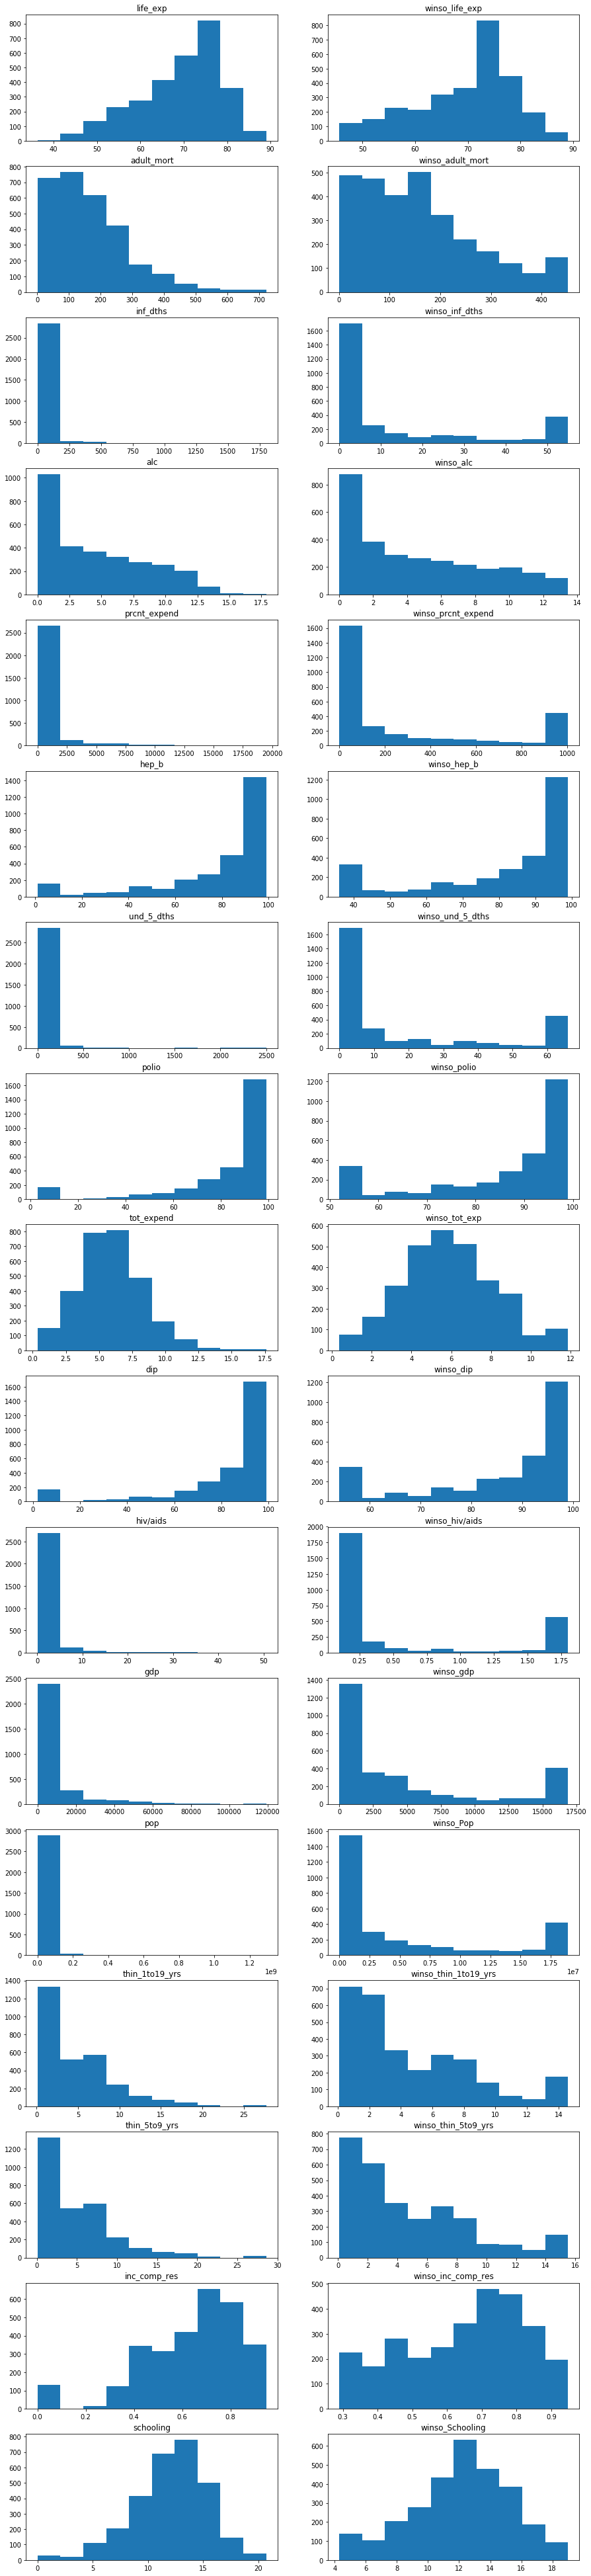

In [120]:
# Distribution of each numerical variable.
all_col = ['life_exp', 'winso_life_exp', 'adult_mort', 'winso_adult_mort', 'inf_dths', 'winso_inf_dths', 'alc','winso_alc',
           'prcnt_expend', 'winso_prcnt_expend', 'hep_b', 'winso_hep_b', 'und_5_dths', 'winso_und_5_dths', 'polio', 
           'winso_polio', 'tot_expend', 'winso_tot_exp', 'dip', 'winso_dip', 'hiv/aids', 'winso_hiv/aids', 'gdp', 'winso_gdp', 'pop', 'winso_Pop', 
        'thin_1to19_yrs', 'winso_thin_1to19_yrs','thin_5to9_yrs', 'winso_thin_5to9_yrs', 'inc_comp_res', 'winso_inc_comp_res', 'schooling', 'winso_Schooling']
          
        
          
         
plt.figure(figsize=(15,75))

for n in range(len(all_col)):
    plt.subplot(18,2, n+1)
    plt.hist(df_le[all_col[n]])
    plt.title(all_col[n])

plt.show()

In [121]:
df_winso_num.columns

Index(['winso_life_exp', 'winso_adult_mort', 'winso_inf_dths', 'winso_alc',
       'winso_prcnt_expend', 'winso_hep_b', 'winso_und_5_dths', 'winso_polio',
       'winso_tot_exp', 'winso_dip', 'winso_hiv/aids', 'winso_gdp',
       'winso_Pop', 'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs',
       'winso_inc_comp_res', 'winso_Schooling'],
      dtype='object')

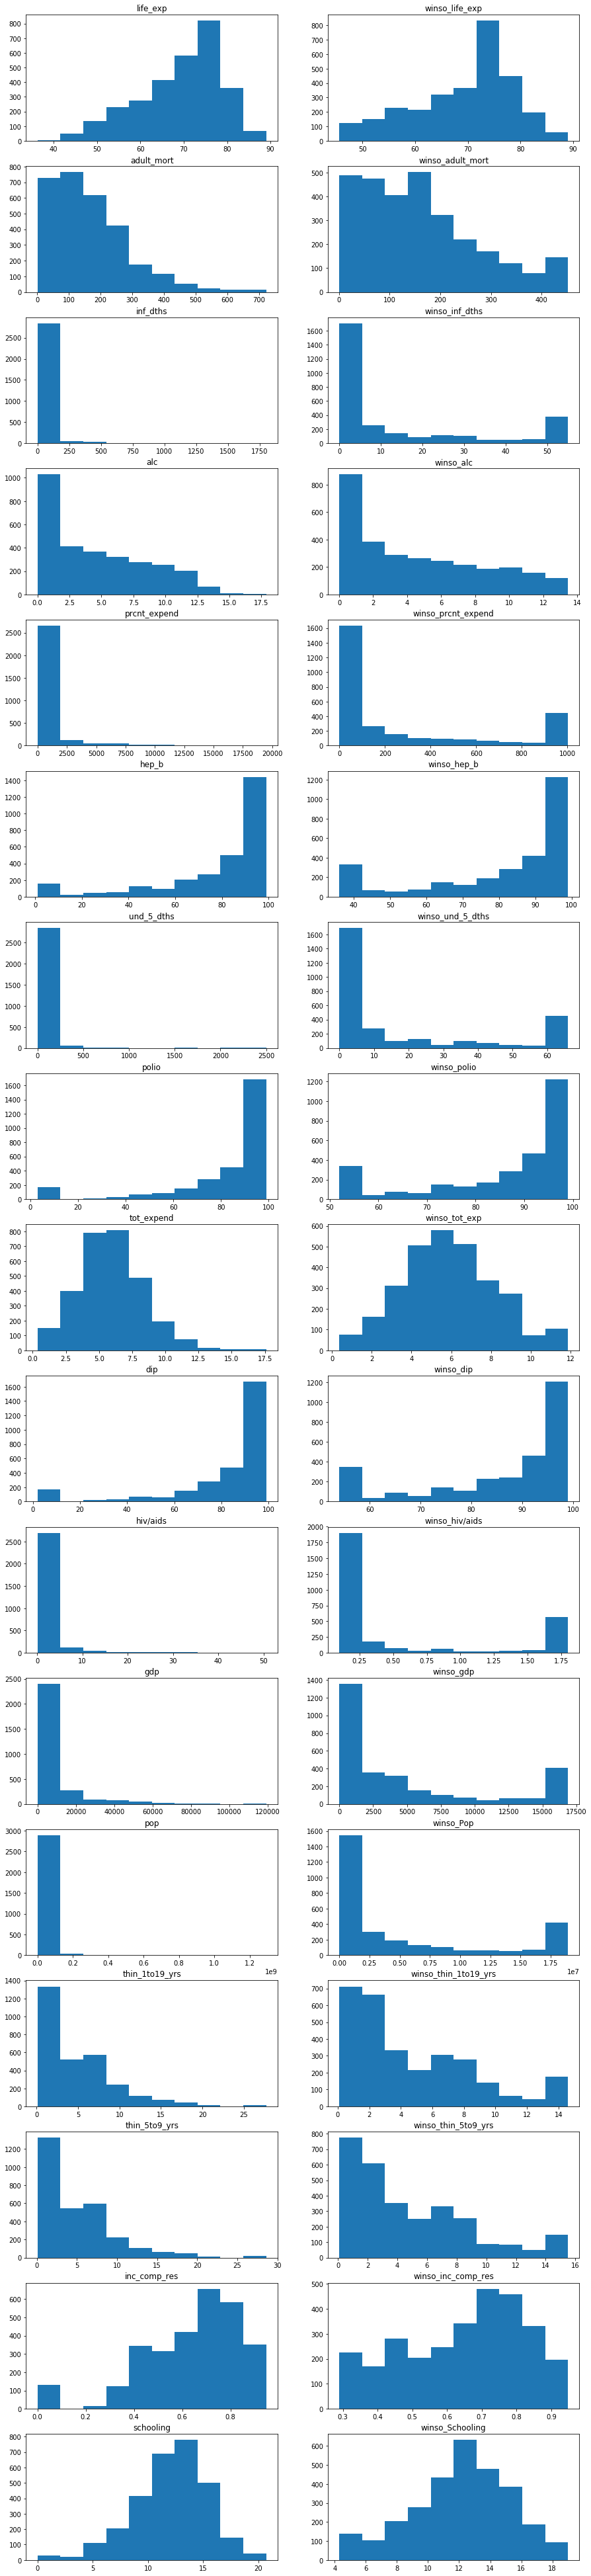

Jarque-Bera test statistics is 304.7752500995846 and p value is 0.0
Normality test statistics is 241.5214253919936 and p value is 3.583346830994468e-53 

Jarque-Bera test statistics is 279.86367710448866 and p value is 0.0
Normality test statistics is 225.87469818248215 and p value is 8.95225591852461e-50 

Jarque-Bera test statistics is 13.140172140388298 and p value is 0.0014016767643534322
Normality test statistics is 15.853466537313276 and p value is 0.0003609636603110578 

Jarque-Bera test statistics is 46.87669447480724 and p value is 6.61996013562316e-11
Normality test statistics is 97.32611963765049 and p value is 7.343475464173624e-22 

Jarque-Bera test statistics is 55272.64238231869 and p value is 0.0
Normality test statistics is 2302.408126180323 and p value is 0.0 

Jarque-Bera test statistics is 339.79264502545124 and p value is 0.0
Normality test statistics is 596.1455763055945 and p value is 3.5369824077319183e-130 

Jarque-Bera test statistics is 167.33970055541508 and

<Figure size 1080x5400 with 0 Axes>

In [122]:
plt.figure(figsize=(15,75))

for n in range(len(all_col)):
    plt.subplot(18,2, n+1)
    plt.hist(df_le[all_col[n]])
    plt.title(all_col[n])

plt.show()


plt.figure(figsize=(15,75))

for n in all_col:
    jb_stats = jarque_bera(np.sqrt(df_le[n]))
    norm_stats = normaltest(np.sqrt(df_le[n]))
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
    print("Normality test statistics is {0} and p value is {1} \n".format(norm_stats[0], norm_stats[1]))




In [123]:
winnum_col = ['winso_life_exp', 'winso_adult_mort', 'winso_inf_dths', 'winso_alc',
       'winso_prcnt_expend', 'winso_hep_b', 'winso_und_5_dths', 'winso_polio',
       'winso_tot_exp', 'winso_dip', 'winso_hiv/aids', 'winso_gdp',
       'winso_Pop', 'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs',
       'winso_inc_comp_res', 'winso_Schooling']

for x in winnum_col:
    print(x)

winso_life_exp
winso_adult_mort
winso_inf_dths
winso_alc
winso_prcnt_expend
winso_hep_b
winso_und_5_dths
winso_polio
winso_tot_exp
winso_dip
winso_hiv/aids
winso_gdp
winso_Pop
winso_thin_1to19_yrs
winso_thin_5to9_yrs
winso_inc_comp_res
winso_Schooling


In [124]:
df_winso_num.shape

(2936, 17)

In [125]:
from sklearn.preprocessing import normalize

winnum_col = ['winso_life_exp', 'winso_adult_mort', 'winso_inf_dths', 'winso_alc',
       'winso_prcnt_expend', 'winso_hep_b', 'winso_und_5_dths', 'winso_polio',
       'winso_tot_exp', 'winso_dip', 'winso_hiv/aids', 'winso_gdp',
       'winso_Pop', 'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs',
       'winso_inc_comp_res', 'winso_Schooling']

for x in winnum_col:
    df_winso_num['norm_'+x] = normalize(np.array(df_winso_num[x]).reshape(1,-1)).reshape(-1,1)
    

In [128]:
df_winso_num.columns

Index(['winso_life_exp', 'winso_adult_mort', 'winso_inf_dths', 'winso_alc',
       'winso_prcnt_expend', 'winso_hep_b', 'winso_und_5_dths', 'winso_polio',
       'winso_tot_exp', 'winso_dip', 'winso_hiv/aids', 'winso_gdp',
       'winso_Pop', 'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs',
       'winso_inc_comp_res', 'winso_Schooling', 'norm_winso_life_exp',
       'norm_winso_adult_mort', 'norm_winso_inf_dths', 'norm_winso_alc',
       'norm_winso_prcnt_expend', 'norm_winso_hep_b', 'norm_winso_und_5_dths',
       'norm_winso_polio', 'norm_winso_tot_exp', 'norm_winso_dip',
       'norm_winso_hiv/aids', 'norm_winso_gdp', 'norm_winso_Pop',
       'norm_winso_thin_1to19_yrs', 'norm_winso_thin_5to9_yrs',
       'norm_winso_inc_comp_res', 'norm_winso_Schooling'],
      dtype='object')

In [129]:
df_winso_num['norm_'+x] = normalize(np.array(df_winso_num[x]).reshape(1,-1)).reshape(-1,1)
df_winso_num.head()

winso_life_exp  winso_adult_mort  winso_inf_dths  winso_alc  \
0            65.0             263.0              55       0.01   
1            59.9             271.0              55       0.01   
2            59.9             268.0              55       0.01   
3            59.5             272.0              55       0.01   
4            59.2             275.0              55       0.01   

   winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0           71.279624         65.0                66         52.0   
1           73.523582         62.0                66         58.0   
2           73.219243         64.0                66         62.0   
3           78.184215         67.0                66         67.0   
4            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  norm_winso_life_exp  norm_winso_adult_mort  \
0             10.1             0.017167               0.024425   
1             10.0             0.015820               0.025168   
2              9.9             0.015820               0.024890   
3              9.8             0.015714               0.025261   
4              9.5             0.015635               0.025540   

   norm_winso_inf_dths  norm_winso_alc  norm_winso_prcnt_expend  \
0              0.04323        0.000031                 0.002901   
1              0.04323        0.000031                 0.002993   
2              0.04323        0.000031                 0.002980   
3              0.04323        0.000031                 0.003183   
4              0.04323        0.000031                 0.000289   

   norm_winso_hep_b  norm_winso_und_5_dths  norm_winso_polio  \
0          0.014452               0.040981          0.011052   
1          0.013785               0.040981          0.012327   
2          0.014230               0.040981          0.013177   
3          0.014897               0.040981          0.014240   
4          0.015119               0.040981          0.014452   

   norm_winso_tot_exp  norm_winso_dip  norm_winso_hiv/aids  norm_winso_gdp  \
0            0.023693        0.013802             0.002153        0.001417   
1            0.023751        0.013165             0.002153        0.001486   
2            0.023606        0.013590             0.002153        0.001533   
3            0.024738        0.014227             0.002153        0.001625   
4            0.022851        0.014439             0.002153        0.000154   

   norm_winso_Pop  norm_winso_thin_1to19_yrs  norm_winso_thin_5to9_yrs  \
0        0.040954                   0.044009                  0.045859   
1        0.000708                   0.044009                  0.045859   
2        0.040954                   0.044009                  0.045859   
3        0.007994                   0.044009                  0.045859   
4        0.006441                   0.044009                  0.045859   

   norm_winso_inc_comp_res  norm_winso_Schooling  
0                 0.013174              0.014879  
1                 0.013092              0.014732  
2                 0.012927              0.014585  
3                 0.012734              0.014438  
4

In [130]:
from sklearn.preprocessing import scale

column = ['winso_life_exp', 'winso_adult_mort', 'winso_inf_dths', 'winso_alc',
       'winso_prcnt_expend', 'winso_hep_b', 'winso_und_5_dths', 'winso_polio',
       'winso_tot_exp', 'winso_dip', 'winso_hiv/aids', 'winso_gdp',
       'winso_Pop', 'winso_thin_1to19_yrs', 'winso_thin_5to9_yrs',
       'winso_inc_comp_res', 'winso_Schooling']
        
for x in column:

    df_winso_num['scaled_'+x] = scale(df_winso_num[x])



In [131]:
df_winso_num.head()

winso_life_exp  winso_adult_mort  winso_inf_dths  winso_alc  \
0            65.0             263.0              55       0.01   
1            59.9             271.0              55       0.01   
2            59.9             268.0              55       0.01   
3            59.5             272.0              55       0.01   
4            59.2             275.0              55       0.01   

   winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0           71.279624         65.0                66         52.0   
1           73.523582         62.0                66         58.0   
2           73.219243         64.0                66         62.0   
3           78.184215         67.0                66         67.0   
4            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  norm_winso_life_exp  norm_winso_adult_mort  \
0             10.1             0.017167               0.024425   
1             10.0             0.015820               0.025168   
2              9.9             0.015820               0.024890   
3              9.8             0.015714               0.025261   
4              9.5             0.015635               0.025540   

   norm_winso_inf_dths  norm_winso_alc  norm_winso_prcnt_expend  \
0              0.04323        0.000031                 0.002901   
1              0.04323        0.000031                 0.002993   
2              0.04323        0.000031                 0.002980   
3              0.04323        0.000031                 0.003183   
4              0.04323        0.000031                 0.000289   

   norm_winso_hep_b  norm_winso_und_5_dths  norm_winso_polio  \
0          0.014452               0.040981          0.011052   
1          0.013785               0.040981          0.012327   
2          0.014230               0.040981          0.013177   
3          0.014897               0.040981          0.014240   
4          0.015119               0.040981          0.014452   

   norm_winso_tot_exp  norm_winso_dip  norm_winso_hiv/aids  norm_winso_gdp  \
0            0.023693        0.013802             0.002153        0.001417   
1            0.023751        0.013165             0.002153        0.001486   
2            0.023606        0.013590             0.002153        0.001533   
3            0.024738        0.014227             0.002153        0.001625   
4            0.022851        0.014439             0.002153        0.000154   

   norm_winso_Pop  norm_winso_thin_1to19_yrs  norm_winso_thin_5to9_yrs  \
0        0.040954                   0.044009                  0.045859   
1        0.000708                   0.044009                  0.045859   
2        0.040954                   0.044009                  0.045859   
3        0.007994                   0.044009                  0.045859   
4        0.006441                   0.044009                  0.045859   

   norm_winso_inc_comp_res  norm_winso_Schooling  scaled_winso_life_exp  \
0                 0.013174              0.014879              -0.447627   
1                 0.013092              0.014732              -0.986529   
2                 0.012927     

In [132]:
df_winso_scaled = df_winso_num.ix[:, 'scaled_winso_life_exp': ]
df_winso_scaled.head()

scaled_winso_life_exp  scaled_winso_adult_mort  scaled_winso_inf_dths  \
0              -0.447627                 0.877483               2.164209   
1              -0.986529                 0.946944               2.164209   
2              -0.986529                 0.920896               2.164209   
3              -1.028796                 0.955627               2.164209   
4              -1.060496                 0.981675               2.164209   

   scaled_winso_alc  scaled_winso_prcnt_expend  scaled_winso_hep_b  \
0         -1.144457                  -0.551098           -0.758331   
1         -1.144457                  -0.544919           -0.905479   
2         -1.144457                  -0.545757           -0.807381   
3         -1.144457                  -0.532086           -0.660233   
4         -1.144457                  -0.727829           -0.611183   

   scaled_winso_und_5_dths  scaled_winso_polio  scaled_winso_tot_exp  \
0                 2.017447           -2.183334              0.961387   
1                 2.017447           -1.791952              0.969930   
2                 2.017447           -1.531031              0.948572   
3                 2.017447           -1.204880              1.115164   
4                 2.017447           -1.139650              0.837511   

   scaled_winso_dip  scaled_winso_hiv/aids  scaled_winso_gdp  \
0         -1.394439              -0.632087         -0.748947   
1         -1.597069              -0.632087         -0.744042   
2         -1.461982              -0.632087         -0.740756   
3         -1.259352              -0.632087         -0.734164   
4         -1.191808              -0.632087         -0.838766   

   scaled_winso_Pop  scaled_winso_thin_1to19_yrs  scaled_winso_thin_5to9_yrs  \
0          2.033984                     2.533384                    2.670131   
1         -0.730535                     2.533384                    2.670131   
2          2.033984                     2.533384                    2.670131   
3         -0.230045                     2.533384                    2.670131   
4         -0.336751                     2.533384                    2.670131   

   scaled_winso_inc_comp_res  scaled_winso_Schooling  
0                  -0.954878               -0.633103  
1                  -0.971887               -0.664509  
2                  -1.005905               -0.695916  
3                  -1.045593               -0.727322  
4                  -1.096620               -0.821542

In [133]:
df_le.head()

cntry   yrs      status  life_exp  adult_mort  inf_dths   alc  \
0  Afghanistan  2015  Developing      65.0       263.0        62  0.01   
1  Afghanistan  2014  Developing      59.9       271.0        64  0.01   
2  Afghanistan  2013  Developing      59.9       268.0        66  0.01   
3  Afghanistan  2012  Developing      59.5       272.0        69  0.01   
4  Afghanistan  2011  Developing      59.2       275.0        71  0.01   

   prcnt_expend  hep_b  measles   bmi  und_5_dths  polio  tot_expend   dip  \
0     71.279624   65.0     1154  19.1          83    6.0        8.16  65.0   
1     73.523582   62.0      492  18.6          86   58.0        8.18  62.0   
2     73.219243   64.0      430  18.1          89   62.0        8.13  64.0   
3     78.184215   67.0     2787  17.6          93   67.0        8.52  67.0   
4      7.097109   68.0     3013  17.2          97   68.0        7.87  68.0   

   hiv/aids         gdp         pop  thin_1to19_yrs  thin_5to9_yrs  \
0       0.1  584.259210  33736494.0            17.2           17.3   
1       0.1  612.696514    327582.0            17.5           17.5   
2       0.1  631.744976  31731688.0            17.7           17.7   
3       0.1  669.959000   3696958.0            17.9           18.0   
4       0.1   63.537231   2978599.0            18.2           18.2   

   inc_comp_res  schooling  winso_life_exp  winso_adult_mort  winso_inf_dths  \
0         0.479       10.1            65.0             263.0              55   
1         0.476       10.0            59.9             271.0              55   
2         0.470        9.9            59.9             268.0              55   
3         0.463        9.8            59.5             272.0              55   
4         0.454        9.5            59.2             275.0              55   

   winso_alc  winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0       0.01           71.279624         65.0                66         52.0   
1       0.01           73.523582         62.0                66         58.0   
2       0.01           73.219243         64.0                66         62.0   
3       0.01           78.184215         67.0                66         67.0   
4       0.01            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5

In [134]:
df_winso.head()

winso_life_exp  winso_adult_mort  winso_inf_dths  winso_alc  \
0            65.0             263.0              55       0.01   
1            59.9             271.0              55       0.01   
2            59.9             268.0              55       0.01   
3            59.5             272.0              55       0.01   
4            59.2             275.0              55       0.01   

   winso_prcnt_expend  winso_hep_b  winso_und_5_dths  winso_polio  \
0           71.279624         65.0                66         52.0   
1           73.523582         62.0                66         58.0   
2           73.219243         64.0                66         62.0   
3           78.184215         67.0                66         67.0   
4            7.097109         68.0                66         68.0   

   winso_tot_exp  winso_dip  winso_hiv/aids   winso_gdp   winso_Pop  \
0           8.16       65.0             0.1  584.259210  18938762.0   
1           8.18       62.0             0.1  612.696514    327582.0   
2           8.13       64.0             0.1  631.744976  18938762.0   
3           8.52       67.0             0.1  669.959000   3696958.0   
4           7.87       68.0             0.1   63.537231   2978599.0   

   winso_thin_1to19_yrs  winso_thin_5to9_yrs  winso_inc_comp_res  \
0             14.605882                 15.5               0.479   
1             14.605882                 15.5               0.476   
2             14.605882                 15.5               0.470   
3             14.605882                 15.5               0.463   
4             14.605882                 15.5               0.454   

   winso_Schooling        cntry   yrs      status  
0             10.1  Afghanistan  2015  Developing  
1             10.0  Afghanistan  2014  Developing  
2              9.9  Afghanistan  2013  Developing  
3              9.8  Afghanistan  2012  Developing  
4              9.5  Afghanistan  2011  Developing

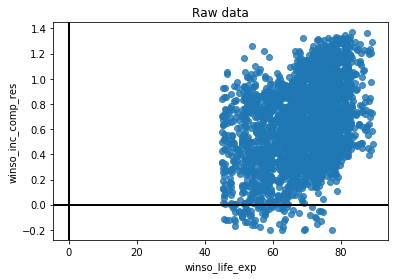

In [135]:
t = sns.regplot(
    'winso_life_exp',
    'winso_inc_comp_res',
    df_winso,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

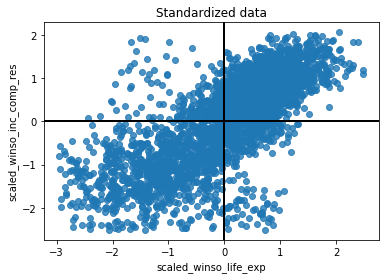

In [136]:
t = sns.regplot(
    'scaled_winso_life_exp',
    'scaled_winso_inc_comp_res',
    df_winso_scaled,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

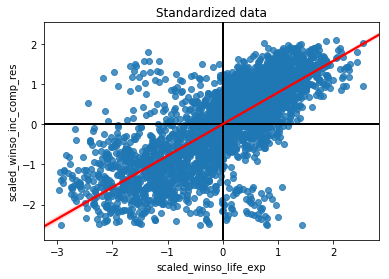

In [137]:
t = sns.regplot(
    'scaled_winso_life_exp',
    'scaled_winso_inc_comp_res',
    df_winso_scaled,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')

sns.regplot(
    'scaled_winso_life_exp',
    'scaled_winso_inc_comp_res',
    df_winso_scaled,
    color="red",
    scatter=False)

plt.show()

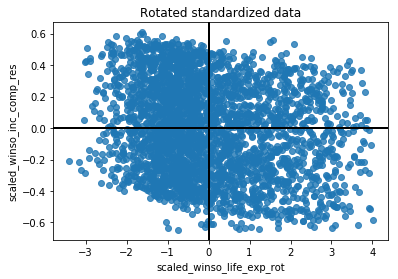

In [138]:
# Rotating the data so that the axes roughly match to vector above.
df_winso_scaled['scaled_winso_life_exp_rot'] = math.cos(40) * df_winso_scaled['scaled_winso_life_exp'] - math.sin(40) * df_winso_scaled['scaled_winso_life_exp']
df_winso_scaled['scaled_winso_inc_comp_res'] = math.sin(40) * df_winso_scaled['scaled_winso_inc_comp_res'] + math.cos(40) * df_winso_scaled['scaled_winso_inc_comp_res']

t = sns.regplot(
    'scaled_winso_life_exp_rot',
    'scaled_winso_inc_comp_res',
    df_winso_scaled,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In the image above, the horizontal vector is longer than the vertical vector, spanning from -4 to 4 rather than -1 to 1. The horizontal axis therefore contains more variance, and has a higher information value, than the vertical vector. If we treated the axes as principal components and discarded the vertical vector, each datapoint would be described solely by its position on the horizontal axis. The information on each datapoint's vertical position would be lost.  Because of the rotation, if we drop the vertical axis now, we lose *less* than 50% of the information.

A significant part of doing PCA is deciding whether the gain from dropping a component from the feature pool is worth the loss of information.

## The Math Behind PCA
The "rotation" pictured above is based on calculating the covariance matrix of the data and applying a linear transformation (rotation) and deriving from that the eigenvalues and eigenvectors that express the amount of variance in the data explained by the new axes.  To explore this further, let's delve into some linear algebra.

## Covariance matrix
A correlation matrix, which we have discussed before, is a covariance matrix where the covariances have been divided by the variances.  This standardizes the covariances so that they are all on the same scale (-1 to 1) and can be compared.  Covariance matrices, like correlation matrices, contain information about the amount of variance shared between pairs of variables.

The variance of x is the sum of the squared differences between each value in x ($x_i$) and the mean of x ($\bar{x}$), divided by the sample size (*n*).

$$var(x)=\frac{\sum(x_i-\bar{x})^2}n$$

(Note that the standard deviation is $\sqrt{var(x)}$)

The covariance between two variables x and y is the product of the differences of each variable value and its mean, divided by the sample size.

$$cov(A)=\sum\frac{(x_i-\bar{x})(y_i-\bar{y})}n$$



### Here is the covariance matrix for the FIFA 19 data:

In [ ]:
df_winso.head()

In [139]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.

X = StandardScaler().fit_transform(df_winso_num)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00034072 -0.6910346  -0.56663429 ... -0.51796846  0.7853002
   0.72666705]
 [-0.6910346   1.00034072  0.38384586 ...  0.36228673 -0.51906911
  -0.460977  ]
 [-0.56663429  0.38384586  1.00034072 ...  0.45813739 -0.45991176
  -0.48718481]
 ...
 [-0.51796846  0.36228673  0.45813739 ...  1.00034072 -0.49455274
  -0.4918535 ]
 [ 0.7853002  -0.51906911 -0.45991176 ... -0.49455274  1.00034072
   0.87714548]
 [ 0.72666705 -0.460977   -0.48718481 ... -0.4918535   0.87714548
   1.00034072]]


In [140]:
X = StandardScaler().fit_transform(df_winso_num)
X

array([[-0.44762716,  0.87748311,  2.16420931, ...,  2.67013093,
        -0.95487839, -0.63310275],
       [-0.98652924,  0.94694449,  2.16420931, ...,  2.67013093,
        -0.97188735, -0.66450925],
       [-0.98652924,  0.92089647,  2.16420931, ...,  2.67013093,
        -1.00590525, -0.69591575],
       ...,
       [-2.4975684 , -0.77222445,  0.59425744, ..., -0.86393124,
        -1.24970021, -0.66450925],
       [-2.4975684 ,  2.51850801,  0.59425744, ..., -0.76438019,
        -1.24970021, -0.72732225],
       [-2.45530157,  2.51850801,  0.54192571, ...,  1.59995717,
        -1.21001265, -0.72732225]])

In [141]:
Xt = X.T
Xt

array([[-0.44762716, -0.98652924, -0.98652924, ..., -2.4975684 ,
        -2.4975684 , -2.45530157],
       [ 0.87748311,  0.94694449,  0.92089647, ..., -0.77222445,
         2.51850801,  2.51850801],
       [ 2.16420931,  2.16420931,  2.16420931, ...,  0.59425744,
         0.59425744,  0.54192571],
       ...,
       [ 2.67013093,  2.67013093,  2.67013093, ..., -0.86393124,
        -0.76438019,  1.59995717],
       [-0.95487839, -0.97188735, -1.00590525, ..., -1.24970021,
        -1.24970021, -1.21001265],
       [-0.63310275, -0.66450925, -0.69591575, ..., -0.66450925,
        -0.72732225, -0.72732225]])

In [142]:
Cx = np.cov(Xt) #Covariance Matrix
Cx

array([[ 1.00034072, -0.6910346 , -0.56663429, ..., -0.51796846,
         0.7853002 ,  0.72666705],
       [-0.6910346 ,  1.00034072,  0.38384586, ...,  0.36228673,
        -0.51906911, -0.460977  ],
       [-0.56663429,  0.38384586,  1.00034072, ...,  0.45813739,
        -0.45991176, -0.48718481],
       ...,
       [-0.51796846,  0.36228673,  0.45813739, ...,  1.00034072,
        -0.49455274, -0.4918535 ],
       [ 0.7853002 , -0.51906911, -0.45991176, ..., -0.49455274,
         1.00034072,  0.87714548],
       [ 0.72666705, -0.460977  , -0.48718481, ..., -0.4918535 ,
         0.87714548,  1.00034072]])

In [143]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)


# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[ 0.18882032+0.j -0.1357539 +0.j -0.15239934+0.j  0.12047142+0.j
  0.12630925+0.j  0.08621713+0.j -0.15849216+0.j  0.14507299+0.j
  0.06643775+0.j  0.14603574+0.j -0.15016506+0.j  0.13176017+0.j
 -0.01742448+0.j -0.14593409+0.j -0.14520202+0.j  0.18006177+0.j
  0.17664055+0.j  0.18882032+0.j -0.1357539 +0.j -0.15239934+0.j
  0.12047142+0.j  0.12630925+0.j  0.08621713+0.j -0.15849216+0.j
  0.14507299+0.j  0.06643775+0.j  0.14603574+0.j -0.15016506+0.j
  0.13176017+0.j -0.01742448+0.j -0.14593409+0.j -0.14520202+0.j
  0.18006177+0.j  0.17664055+0.j  0.18882032+0.j -0.1357539 +0.j
 -0.15239934+0.j  0.12047142+0.j  0.12630925+0.j  0.08621713+0.j
 -0.15849216+0.j  0.14507299+0.j  0.06643775+0.j  0.14603574+0.j
 -0.15016506+0.j  0.13176017+0.j -0.01742448+0.j -0.14593409+0.j
 -0.14520202+0.j  0.18006177+0.j  0.17664055+0.j]
Eigenvalue 1: (22.04712855679743+0j)
----------------------------------------
Eigenvector 2: 
[ 3.26043517e-02+0.j -3.52740927e-02+0.j  2.14651251e-04+0.j

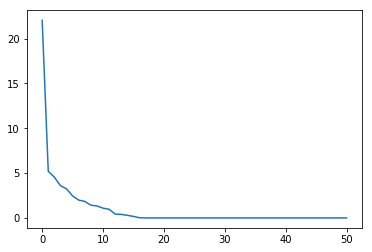

[ 2.20471286e+01+0.00000000e+00j  5.20518041e+00+0.00000000e+00j
  4.54662743e+00+0.00000000e+00j  3.59893151e+00+0.00000000e+00j
  3.24003690e+00+0.00000000e+00j  2.45350068e+00+0.00000000e+00j
  1.98576116e+00+0.00000000e+00j  1.84335276e+00+0.00000000e+00j
  1.42150422e+00+0.00000000e+00j  1.33517017e+00+0.00000000e+00j
  1.08729418e+00+0.00000000e+00j  9.62737470e-01+0.00000000e+00j
  4.22720148e-01+0.00000000e+00j  3.94952258e-01+0.00000000e+00j
  2.89029031e-01+0.00000000e+00j  1.66090514e-01+0.00000000e+00j
  1.73590794e-02+0.00000000e+00j  8.69983674e-16+0.00000000e+00j
 -2.57360575e-16+7.49779731e-16j -2.57360575e-16-7.49779731e-16j
 -7.65532203e-16+1.57948008e-16j -7.65532203e-16-1.57948008e-16j
  6.90729691e-16+0.00000000e+00j  5.90267892e-16+2.53317773e-16j
  5.90267892e-16-2.53317773e-16j  4.80247066e-16+0.00000000e+00j
  1.64324831e-16+4.40106750e-16j  1.64324831e-16-4.40106750e-16j
  2.76271216e-17+4.40504323e-16j  2.76271216e-17-4.40504323e-16j
  2.88409972e-16+2.728971

In [144]:
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

[0.4321494  0.1020276  0.08911919 0.07054325 0.0635085 ]


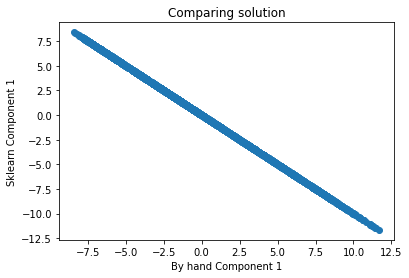

In [145]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

#Transform X into Y
Y=P.T.dot(Xt)

print(sklearn_pca.explained_variance_ratio_)

#Compare the sklearn solution to our - a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solution')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By hand Component 1')
plt.show()

    

In [146]:
sklearn_pca

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
Y_sklearn

array([[ 7.98893496, -0.59860256,  4.82722376, -1.37932589, -0.36474873],
       [ 8.15432506, -0.26448725,  1.81678788, -1.78508167,  0.89267866],
       [ 8.12840851, -0.92715113,  4.7360237 , -1.03604752, -0.05526707],
       ...,
       [ 4.33637551,  2.62130864, -1.92571774,  2.55382254, -1.23111548],
       [ 5.87721213,  1.87894502, -0.5610949 ,  4.24329193,  0.09919079],
       [ 7.63156864, -0.86648371,  0.25065461,  2.26000571,  3.04350062]])

In [148]:
P = eig_vec_cov[:, 0]
P


array([ 0.18882032+0.j, -0.1357539 +0.j, -0.15239934+0.j,  0.12047142+0.j,
        0.12630925+0.j,  0.08621713+0.j, -0.15849216+0.j,  0.14507299+0.j,
        0.06643775+0.j,  0.14603574+0.j, -0.15016506+0.j,  0.13176017+0.j,
       -0.01742448+0.j, -0.14593409+0.j, -0.14520202+0.j,  0.18006177+0.j,
        0.17664055+0.j,  0.18882032+0.j, -0.1357539 +0.j, -0.15239934+0.j,
        0.12047142+0.j,  0.12630925+0.j,  0.08621713+0.j, -0.15849216+0.j,
        0.14507299+0.j,  0.06643775+0.j,  0.14603574+0.j, -0.15016506+0.j,
        0.13176017+0.j, -0.01742448+0.j, -0.14593409+0.j, -0.14520202+0.j,
        0.18006177+0.j,  0.17664055+0.j,  0.18882032+0.j, -0.1357539 +0.j,
       -0.15239934+0.j,  0.12047142+0.j,  0.12630925+0.j,  0.08621713+0.j,
       -0.15849216+0.j,  0.14507299+0.j,  0.06643775+0.j,  0.14603574+0.j,
       -0.15016506+0.j,  0.13176017+0.j, -0.01742448+0.j, -0.14593409+0.j,
       -0.14520202+0.j,  0.18006177+0.j,  0.17664055+0.j])

In [149]:
#Transform X into Y
Y = P.T.dot(Xt)
Y

array([-7.98893496+0.j, -8.15432506+0.j, -8.12840851+0.j, ...,
       -4.33637551+0.j, -5.87721213+0.j, -7.63156864+0.j])

In [150]:
print(sklearn_pca.explained_variance_ratio_)

[0.4321494  0.1020276  0.08911919 0.07054325 0.0635085 ]
